# Program scenario.

This program simulates the complete commodity trading behavior in a cake shop, providing corresponding functions for various scenarios in daily life for users to choose from. Its main functional parts can be divided into four scenarios: inventory management for incoming goods, outgoing goods management, generation of bills and calculation of discounted prices when customers make purchases, and searching and sorting of various commodities according to various needs.

1. **Inventory Management Section:**
   - Simulates manual addition of inventory by users when dealing with small quantities of products.
   - Simulates adding inventory from external files when dealing with a large quantity of products.
   - Simulates users obtaining a specific replenishment list and then performing a unified replenishment operation.
2. **Outgoing Goods and Transaction Section:**
   - Simulates real-world transactions where goods are only considered outgoing once users successfully check out.
   - Simulates scenarios where salespersons add items to the bill by scanning their barcodes using barcode scanners.
   - Simulates situations where customers inquire about the availability of certain products, allowing salespersons to add them to the bill by product name.
   - Simulates scenarios where customers decide not to purchase certain items and remove them from the bill.
   - Simulates scenarios where customers purchase multiple units of the same product, allowing salespersons to manually adjust the quantity.
   - Simulates the checkout process in real-world transactions, allowing customers to split payments. After checkout, the data is written to an external file, and these items are then removed from the inventory.
3. **Product Query Section:**
   - Allows users to directly search for all items in the inventory, all cakes, all cookies, items priced below a certain amount, items priced above a certain amount, items with discounts, and products that meet replenishment criteria. Users can choose to sort the results by name, price, inventory level, or discount, and select either ascending or descending order for sorting.
   

#Description of the program requirements.

This program requires initialization of the inventory through an external product file. The format of the file is as follows:

`product_name\t product_type\t product_price\t product_quantity\t discount_rule1\t discount_percentage`

The program writes all the remaining inventory to a file named "remaining_inventory.txt" whenever an inventory check-in or check-out operation is performed. This ensures the persistence of inventory data. Even if the program is closed and restarted, it will automatically read this file to load the remaining inventory from the last session, simulating the continuous changes in inventory in a real store.

When using the trade function, the system generates a bill. Only when the bill is fully paid will the goods be shipped from the warehouse and the inventory deducted. If the trade is interrupted before completion, the shipment will not be completed. When a bill is fully paid and shipped, the program generates daily sales data in the format "year-month-day-week-outbound_list.txt". When the program is closed and restarted, the daily sales data can still be loaded back from this file. If this file does not exist, the system will print an empty table to indicate that no transactions have been completed on that day.

# The problem my program is trying to solve using object-oriented programming.



## **Design-Level Issues:**

> **1. Individual Discount Conditions and Rates for Each Product:**
>
> - How can each product have its own unique discount conditions and rates?
>
> **2. Independent Storage of Product Information:**
>
> - How can each product independently store its own information, such as name, price, quantity, etc.?
>
> **3. Product Existence Check during Inventory Addition:**
>
> - How can the system determine if a product already exists when adding a new item to the inventory? If it exists, how can it directly add stock to the existing product instead of creating a new one?
>
> **4. Manual Inventory Creation:**
>
> - How can users create inventory information for products manually to accommodate small-quantity inventory additions?
>
> **5. Automatic Inventory Import from Files:**
>
> - How can the system automatically import product information from files into the inventory?
>
> **6. Product Coding and Management:**
>
> - How can the system manage product codes after inventory addition to facilitate subsequent search and sales operations?
>
> **7. Product Checkout:**
>
> - How can the system perform a checkout operation for the products in a completed transaction?
>
> **8. Transaction Data Persistence:**
>
> - How can the system persist transaction data for future reference?
>
> **9. Daily Sales Data Generation:**
>
> - How can the system automatically generate daily sales data files to meet users' potential transaction analysis needs?
>
> **10. Product Search:**
>
> - How can users search for products based on specific criteria to meet their needs in sales scenarios, such as knowing product information to introduce to customers?
>
> **11. Product Data Sorting:**
>
> - How can the system sort the search results based on specific criteria to meet users' needs to quickly understand product information based on different factors?
>
> **12. Unified Inventory Management:**
>
> - How can the checkout, inventory addition, and product search functions operate on the same inventory to ensure data is updated and calculated in real-time?
>
> **13. Dynamic Order Management:**
>
> - How can the system manage products during transactions? Specifically, how can it allow users to dynamically add items with varying quantities to the bill?
>
> **14. Bill Calculation:**
>
> - How can the system calculate the prices, discounts, taxes, and other relevant information for the items in the bill?
>
> **15. Bill Display:**
>
> - How can the system display the bill to both the user and the customer?
>
> **16. Inventory Quantity Check:**
>
> - How can the system ensure that the quantity of an item added to the bill does not exceed its inventory stock?
>
> **17. Comprehensive Function Integration:**
>
> - How can all the above operations be integrated to form more complex functionalities that simulate complete store operations?
>
> **18. User Interface Design:**
>
> - How can an interactive interface be provided to meet users' needs for ease of use?
>
> **19. Multi-Level Menu Implementation:**
>
> - How can a multi-level menu be implemented to allow users to navigate through different sub-functions within the same menu?
>
>

#Analysis of the problem
##1. How can each product have its own unique discount conditions and rates?
- Create a class object named `Discount` and combine it with the `Product` class so that each product's discount conditions and discount rates are managed by the `Discount` class object within the `Product` class.

## 2. How can each product independently store its own information, such as name, price, quantity, etc.?
- Create a class named `Product` to independently manage these specific details of the products, with each product corresponding to an object of the `Product` class.

##3. How can the system determine if a product already exists when adding a new item to the inventory? If it exists, how can it directly add stock to the existing product instead of creating a new one?

- Overload the `==` and `!=` operators in the `Product` class to compare all attributes of a product except the quantity. If all attributes are the same, the two products are considered identical. Since each product corresponds to a unique code, simply check whether the product under this code is the same as the product being added to determine if it already exists in the warehouse. If they are the same, use the overloaded `+` operator in the `Product` class to sum their quantities to get the new stock.

##4. How can users create inventory information for products manually to accommodate small-quantity inventory additions?
- Create a `CIM_System` class and add public functions to it that accept a `Product` class object, with the function adding it to the inventory. The process of creating the `Product` class object with user input information is handled outside the interface. The management and storage of products are handled and managed by the `Warehouse` class object.

##5. How can the system automatically import product information from files into the inventory?
- Overload the function in the `CIM_System` class that handles the warehousing of a single `Product` to accept an `ifstream` object, read product information from a text file separated by "\t", and create a temporary `Product` object, which is then passed to the function that handles warehousing a single `Product` object.

##6. How can the system manage product codes after inventory addition to facilitate subsequent search and sales operations?
- The calculation of the product's code is performed by the `CIM_System` when warehousing, based on the product's name, and added to the private data members of the `Product` object.

##7. How can the system perform a checkout operation for the products in a completed transaction?
- When a bill is fully settled, a `COM_System` class object receives the bill and iterates through its contents, removing items from the warehouse to reduce the stock.

##8. How can the system persist transaction data for future reference? How can the system automatically generate daily sales data files to meet users' potential transaction analysis needs?
- After each transaction is completed, the `COM_System` class object removes items from the warehouse and writes the product data one by one into a file named in the format "year-month-day-weekday-outbound_list.txt," thus achieving the persistence of daily sales data.

##9. How can users search for products based on specific criteria to meet their needs in sales scenarios, such as knowing product information to introduce to customers?
- Create a `CS_System` class object and add functions for various search criteria, allowing users to choose as needed during use.

##10. How can the system sort the search results based on specific criteria to meet users' needs to quickly understand product information based on different factors?
- Create a `Product_List` class object to store the found `Product` class objects, and then call the specified sorting function based on the sorting instructions input by the user.

##11. How can the checkout, inventory addition, and product search functions operate on the same inventory to ensure data is updated and calculated in real-time?
- The `CIM_System`, `COM_System`, and `CS_System` class objects all have a private data member named `warehouse_accessor`. In the constructors, each of these three classes accepts a `Warehouse` class object, which is maintained by `warehouse_accessor` and used to access the contents of the `Warehouse` class object. Thus, by passing the same `Warehouse` object when creating these three class objects, the same warehouse can be operated on simultaneously, ensuring real-time data updates.

##12. How can the system manage products during transactions? Specifically, how can it allow users to dynamically add items with varying quantities to the bill?
- The `Bill` class is responsible for managing the products being traded and inherits from `Product_List`. The `Product_List` class implements automatic space management, automatically expanding capacity based on the number of internal elements and pre-allocated size, allowing `Bill` to accommodate any number of products added by the user.

##13. How can the system calculate the prices, discounts, taxes, and other relevant information for the items in the bill?
- Create a `Trade_System` class object, which is a pure virtual class and should not be instantiated. It only provides static functions for use by `Bill`. In the `Bill` class object, these static functions are automatically used to complete a series of calculations.

##14. How can the system display the bill to both the user and the customer?
- Create a friend function `print` for the `Bill` class, which uses `iomanip` to set the output format and display the bill content to the user.
##15. How can the system ensure that the quantity of an item added to the bill does not exceed its inventory stock? How can all the above operations be integrated to form more complex functionalities that simulate complete store operations?

- Create a `Trade_Manager` class object composed of `CIM_System`, `COM_System`, `CS_System`, `Warehouse`, and `Bill` class objects. These five class objects use their own public functions to compose more complex functions, simulating complex store transaction behaviors.

##16. How can an interactive interface be provided to meet users' needs for ease of use?
- Create various interface functions that accept a `Trade_Manager` class object as a parameter. These functions perform a series of operations based on user input choices and include error handling code to prevent program crashes due to incorrect user input.

##17. How can a multi-level menu be implemented to allow users to navigate through different sub-functions within the same menu?
- By setting exit conditions for each level of menu in the main.cpp file, the user will only exit to the previous menu level when the input meets the exit conditions, allowing the user to stay within the last selected menu and continuously choose its sub-functions.


#How to run the program
When first use this program, user have to give a file which contain the information of products. The program will use this file to initialize the warehouse. After first initialized it, it will write a file called remaining_inventory.txt which contains all the information of products that are remaing in the last program run. After the remaing_inventory file has been created, the program will automatically reload it into the warehouse without user's command when user close and restart this program.

When initialize the program and start to use, user through keyborad to enter numbers to choose which function they need and enter a certain quit key to quit the menu they are. To better simulate the operation in a cashier's desk, all the input would only use numeric keys except enter the filename and product's name

#Explanation:

The following txt file is created by another code i writed , the number of price, quantity, discount rule, discount percentage is generate by the code randomly. The rule of generator is that the price is a `double` type number between 5 and 100. The quantity is an integer between 1 and 100. The discount rule is also an integer but between 3 and 20. The discount percentage is a `double` type number between 0.5 and 0.9. To perform better calculate ability, I limit their decimal precision to two.
This file has 458 lines of products' information. The name of product was generator from AI. As this case, some of the names may feel strange and some names contain the word "cookie" but are recognized as a cake. However, all these things wounldn't affect the running result of the program.

In [7]:
%%writefile product_list.txt
Brownie Cheesecake	1	71.20	33	14	0.77
Red Wine Velvet Cake	1	6.26	76	18	0.85
Coconut Pineapple Cake	1	25.77	42	8	0.76
Strawberry Rhubarb Cake	1	70.22	89	9	0.70
Blueberry Lemon Cake	1	94.56	37	7	0.84
Lemon Lavender Cake	1	72.85	34	17	0.62
Pink Champagne Cake	1	20.90	100	19	0.71
Lemon Elderflower Cake	1	59.37	60	9	0.88
Toffee Crunch Cake	1	76.77	63	20	0.73
Caramel Apple Cake	1	32.16	63	17	0.68
Churro Cake	1	67.49	15	8	0.58
Chocolate Guinness Cake	1	23.92	73	20	0.60
Pumpkin Spice Latte Cake	1	51.19	59	12	0.66
Snickers Cake	1	67.81	97	5	0.62
Brown Butter Cake	1	6.25	17	4	0.55
Cherry Almond Cake	1	92.58	97	18	0.62
Chocolate Cherry Cake	1	69.98	26	10	0.89
Chocolate Mousse Cake	1	29.40	98	18	0.78
Cotton Candy Cake	1	49.08	97	10	0.56
Margarita Cake	1	42.63	24	4	0.66
Strawberry Champagne Cake	1	89.19	79	12	0.89
Cinnamon Roll Cake	1	69.63	1	12	0.53
Blackberry Cake	1	89.51	37	7	0.84
Pina Colada Cake	1	34.16	20	15	0.54
Coconut Mango Cake	1	98.49	78	9	0.89
Salted Caramel Chocolate Cake	1	15.70	32	10	0.51
Pistachio Rose Cake	1	62.38	18	18	0.73
Peach Cobbler Cake	1	69.75	66	9	0.54
Chocolate Peanut Butter Cake	1	49.35	25	18	0.85
Mint Chocolate Chip Cake	1	91.26	95	9	0.64
White Chocolate Raspberry Cake	1	99.06	82	7	0.69
Neapolitan Cake	1	64.20	97	11	0.89
Raspberry Cake	1	25.54	1	16	0.85
Hazelnut Cake	1	49.22	55	14	0.51
Pumpkin Spice Cake	1	8.66	54	6	0.86
Cranberry Cake	1	79.62	1	8	0.70
Pistachio Cake	1	87.39	96	10	0.83
Chocolate Covered Strawberry Cake	1	71.45	10	7	0.70
Marble Cake	1	20.78	40	20	0.79
Cherry Cake	1	54.76	91	15	0.63
Butterfly Cake	1	48.73	78	17	0.81
Mango Cake	1	21.50	11	5	0.72
Strawberry Shortcake	1	75.20	13	6	0.62
Coffee Cake	1	92.85	29	13	0.72
Pineapple Upside Down Cake	1	53.74	89	7	0.82
Victoria Sponge Cake	1	70.68	70	17	0.70
Cheesecake	1	70.58	94	6	0.71
Chocolate Fudge Cake	1	25.38	46	12	0.83
Hello Dolly Bars	1	99.16	83	5	0.58
Rice Krispies Squares	1	88.19	48	3	0.73
Brownie Bars	1	36.88	83	4	0.88
Peanut Butter Cookie Bars	1	54.77	44	6	0.69
Oatmeal Raisin Cookie Bars	1	13.99	30	5	0.56
Chocolate Chip Cookie Bars	1	46.31	96	9	0.77
Mint Chocolate Chip Brownies	1	98.01	75	4	0.80
Peanut Butter Brownies	1	29.54	70	17	0.75
Walnut Brownies	1	83.00	30	9	0.64
Chocolate Chip Brownies	1	89.90	66	18	0.68
Chocolate Orange Cake	1	12.67	48	7	0.60
Almond Shortbread Cookies	1	35.25	70	9	0.58
Lemon Shortbread Cookies	1	31.81	75	15	0.75
Chocolate Shortbread Cookies	1	10.28	73	18	0.60
Pumpkin Cheesecake	1	80.85	83	4	0.68
Shortbread Cookies	1	14.83	98	6	0.83
Gingerbread Cake	1	46.97	8	11	0.77
No-Bake Bars	1	23.82	48	5	0.67
Lemon Drizzle Cake	1	86.71	89	9	0.63
Chicken Fingers	1	23.86	83	3	0.54
Champagne Cake	1	89.23	45	3	0.70
Onion Rings	1	23.14	95	20	0.87
Mozzarella Sticks	1	15.10	1	10	0.84
Veggie Platter	1	76.16	58	6	0.88
Fruit Salad	1	60.12	87	4	0.90
Salads	1	11.06	52	11	0.70
Wraps	1	49.50	27	6	0.50
Pizza	1	72.95	24	6	0.56
Wings	1	95.18	82	6	0.60
Chips and Dip	1	85.00	2	18	0.68
S'mores Bars	1	20.66	17	12	0.82
Party Mix	1	81.59	40	5	0.69
Dip Platter	1	91.59	83	12	0.82
Cheese Platter	1	44.28	33	17	0.71
Guacamole	1	44.72	52	18	0.50
Nachos	1	77.65	61	19	0.73
Potato Chips	1	8.38	34	18	0.70
Pretzels	1	39.80	73	20	0.75
Trail Mix	1	80.85	37	6	0.70
Candy Bars	1	92.62	43	14	0.81
Rock Candy	1	39.64	3	6	0.70
Cotton Candy	1	35.46	57	19	0.50
Lollipops	1	56.11	32	6	0.63
Lemon Raspberry Cake	1	40.11	55	12	0.54
Gingerbread Cookies	1	95.32	30	4	0.84
Gummy Bears	1	91.37	68	9	0.68
Caramels	1	42.56	43	7	0.58
Pralines	1	94.08	73	9	0.62
Chocolate Truffles	1	53.62	67	10	0.64
Frozen Yogurt	1	81.06	64	19	0.67
Vanilla Bean Cake	1	46.57	35	14	0.63
Sorbet	1	36.77	32	5	0.55
Fruit Skewers	1	72.82	10	11	0.58
Cheese Dip	1	96.29	21	8	0.83
Gelato	1	74.62	43	12	0.72
Ice Cream Cake	1	9.52	1	15	0.78
French Toast	1	20.58	84	5	0.84
Crepes	1	60.62	42	20	0.65
Marshmallows	1	50.75	6	13	0.87
Pancakes	1	71.54	33	20	0.52
Biscuits	1	22.62	42	14	0.82
Black Forest Brownies	1	77.15	53	5	0.55
Croissants	1	46.03	6	4	0.56
Chocolate Hazelnut Cake	1	68.38	86	10	0.83
Strawberry Doughnuts	1	29.72	27	14	0.69
Chocolate Doughnuts	1	51.48	89	15	0.57
Glazed Doughnuts	1	67.18	19	3	0.69
Doughnuts	1	51.47	31	20	0.88
Seven-Layer Bars	1	8.75	25	20	0.61
Macarons	1	50.13	90	9	0.53
Biscotti	1	13.70	62	13	0.82
Cookies	1	58.01	95	18	0.88
Brownies	1	66.70	19	13	0.61
Raspberry Lemonade Cake	1	39.35	16	10	0.60
Cupcakes	1	10.91	50	11	0.57
Sandwiches	1	92.83	96	20	0.55
Muffins	1	21.97	59	15	0.57
Banana Bread	1	24.22	80	15	0.77
Scones	1	16.02	79	12	0.58
Apple Pie	1	58.13	29	4	0.82
Honey Lavender Cake	1	20.31	13	4	0.64
Peanut Butter Marshmallows cookie	1	88.02	61	12	0.82
Double Chocolate cookie	1	14.72	78	17	0.74
Apple Cake	1	62.10	93	16	0.61
Gummy Worms cookie	1	7.99	72	6	0.83
Heath Bar Chips cookie	1	88.14	35	4	0.72
Fudge cookie	1	53.35	78	14	0.82
Snickerdoodle Cookies	1	79.36	81	4	0.63
Charcuterie Board	1	37.84	16	9	0.77
Blueberries cookie	1	92.37	52	7	0.86
Hummingbird Cake	1	48.22	92	5	0.82
Butterscotch Chips cookie	1	87.48	6	18	0.85
Rice Krispies Treats	1	95.49	12	9	0.76
Key Lime Cookie	1	75.71	43	20	0.56
Mint Chocolate Chips cookie	1	7.18	92	18	0.77
Butterscotch Cookie	1	91.42	75	14	0.61
Candy Corn	1	27.92	14	19	0.67
Dark Chocolate Chips cookie	1	17.79	6	9	0.83
Caramel Bars cookie	1	38.28	4	5	0.71
Black Forest Cookie	1	67.41	93	9	0.53
Caramel Apple Cookie	1	80.30	86	7	0.80
Gumdrops	1	28.47	22	19	0.73
White Chocolate Chips cookie	1	89.05	17	6	0.67
Snickerdoodle cookie	1	21.42	2	16	0.56
Coconut Chips cookie	1	61.90	100	9	0.81
Sliders	1	84.08	14	4	0.78
Oreos cookie	1	25.58	93	6	0.71
Chocolate Fudge cookie	1	34.06	13	3	0.80
Granola Bars	1	65.78	7	10	0.87
Chocolate Dipped Cookie	1	6.34	57	19	0.53
M&Ms cookie	1	37.04	75	7	0.55
Nuts cookie	1	74.38	8	18	0.82
Chai Spice Cake	1	90.59	55	13	0.59
Dried Fruit cookie	1	81.93	99	13	0.58
Baklava Cake	1	81.74	24	13	0.52
Lavender Cookie	1	57.61	13	4	0.83
Lemon Poppy Seed Cake	1	69.73	86	17	0.89
Edible Glitter cookie	1	52.39	93	7	0.56
Baking Powder cookie	1	33.95	94	10	0.52
Pistachio Cranberry Cookie	1	55.69	64	13	0.64
Stars cookie	1	12.93	72	3	0.89
Chocolate Bars cookie	1	49.65	47	6	0.84
Peach Cobbler	1	78.18	77	12	0.83
Chocolate Peanut Butter Cookie	1	19.51	54	3	0.86
Drags cookie	1	83.22	64	3	0.61
Sprinkles cookie	1	78.69	8	6	0.74
Chocolate Chunk Cookie	1	97.97	70	17	0.83
Light Brown Sugar cookie	1	19.73	95	15	0.63
Turbinado Sugar cookie	1	8.61	93	19	0.63
Hummus and Veggies	1	74.53	70	16	0.51
Raspberry Almond Cookie	1	87.92	10	3	0.84
Powdered Sugar cookie	1	79.44	6	20	0.85
Raw Sugar cookie	1	79.90	57	5	0.66
Pumpkin Spice Cookie	1	46.29	69	5	0.88
Brown Sugar cookie	1	9.72	56	10	0.50
Grapefruit Cake	1	15.00	22	20	0.68
Coconut Sugar cookie	1	66.58	85	13	0.58
Corn Syrup cookie	1	43.54	68	14	0.66
Chocolate Cake	1	37.29	6	7	0.66
Almond Biscotti	1	38.56	100	13	0.58
Brownie cookie	1	77.18	53	20	0.81
Sea Salt cookie	1	89.24	24	8	0.85
Chocolate Caramel Cake	1	81.36	79	6	0.62
Ginger Spice Cake	1	84.31	11	5	0.67
Allspice cookie	1	57.65	59	13	0.86
Chocolate Strawberry Cake	1	35.82	65	11	0.66
Lavender Cake	1	54.23	51	16	0.54
Blondies	1	33.95	41	10	0.88
Raisins cookie	1	86.15	69	6	0.64
Cinnamon cookie	1	88.77	82	17	0.57
Almond Extract cookie	1	80.14	29	11	0.51
Pistachio Cardamom Cake	1	82.74	61	5	0.88
Chocolate Extract cookie	1	32.01	76	4	0.51
Vanilla Extract cookie	1	21.25	19	7	0.72
Hearts cookie	1	9.20	64	14	0.72
Gummy Stars cookie	1	13.16	64	7	0.74
Raspberry Thumbprint Cookie	1	18.56	52	19	0.51
White Chocolate Macadamia Nut cookie	1	38.95	49	17	0.60
Pecan cookie	1	43.30	92	3	0.78
Raisin cookie	1	91.08	7	8	0.65
Danish Pastry	1	38.08	38	12	0.83
Cranberries cookie	1	70.93	28	13	0.54
Peanut Butter Cookies	1	79.31	88	11	0.83
Strawberry Cake	1	10.75	26	9	0.82
Demerara Sugar cookie	1	88.01	19	5	0.67
Nonpareils cookie	1	87.92	67	9	0.64
Gummy Bears cookie	1	57.40	43	20	0.63
Maple Syrup cookie	1	11.54	63	11	0.61
Double Chocolate Cookie	1	76.88	73	3	0.71
Ginger cookie	1	23.48	1	16	0.87
Walnut cookie	1	20.16	94	9	0.61
Peanut Butter Cake	1	80.44	91	8	0.69
Mini cookie	1	50.03	83	17	0.72
Blueberry Lemon Cookie	1	80.16	80	17	0.64
Pumpkin Oatmeal Cookie	1	75.56	52	3	0.80
Cranberry Orange Cookie	1	26.73	6	13	0.56
Lemon cookie	1	11.62	65	6	0.77
Strawberry cookie	1	76.61	79	13	0.69
Strawberry Marshmallows cookie	1	7.29	60	10	0.62
M&M cookie	1	77.68	28	10	0.56
Chocolate Chip cookie	1	84.63	22	10	0.67
Blueberry cookie	1	66.66	70	18	0.77
Jimmies cookie	1	55.18	2	6	0.67
Coconut Lime Cookie	1	47.72	33	15	0.78
Almond Cake	1	76.52	78	18	0.73
Almond cookie	1	66.65	15	16	0.78
Heath Bar cookie	1	60.90	19	3	0.51
Pumpkin Brownies	1	53.35	56	7	0.72
Cannoli	1	51.93	76	8	0.81
Dark Chocolate cookie	1	97.41	18	4	0.63
Chocolate-Covered Pretzels	1	66.67	76	4	0.61
Fudgy Brownies	1	12.72	29	20	0.53
Cane Sugar cookie	1	84.74	62	11	0.68
Chocolate cookie	1	91.11	93	14	0.58
White Chocolate cookie	1	60.15	52	17	0.75
Mint Julep Cake	1	71.11	66	13	0.58
Nutmeg cookie	1	47.65	49	18	0.86
Blondie cookie	1	21.63	4	12	0.79
Chocolate Chip Cookie	0	43.64	93	7	0.87
Oreo Cheesecake	0	43.33	63	15	0.52
Mint Chocolate Chip Cookie	0	39.70	100	20	0.84
Peanut Butter Cup cookie	0	81.54	83	8	0.66
Salsa	0	93.01	51	13	0.87
Mini Marshmallows cookie	0	45.16	51	19	0.90
Cookies and Cream Cake	0	97.46	43	3	0.57
Lemon Coconut Cookie	0	57.14	41	12	0.58
Agave Nectar cookie	0	22.11	5	16	0.61
Caramel Marshmallows cookie	0	90.63	78	15	0.50
White Chocolate Macadamia Nut Cookie	0	15.18	51	5	0.78
Cherry Cookie	0	76.49	57	5	0.61
Peanut Butter cookie	0	55.36	65	19	0.70
Oatmeal Raisin Cookies	0	57.59	6	7	0.78
Fruit Preserves cookie	0	61.78	33	4	0.74
Fruit Chunks cookie	0	7.49	61	12	0.53
Banana Cake	0	43.94	29	17	0.52
Egg cookie	0	17.09	28	5	0.74
Butter cookie	0	73.01	77	13	0.63
Shortbread cookie	0	56.41	93	6	0.86
Chocolate Chips cookie	0	62.18	46	18	0.58
Rainbow cookie	0	20.30	86	19	0.56
Fruit Platter	0	88.30	55	16	0.80
Candied Fruit cookie	0	87.04	63	10	0.71
Almond Butter Cookie	0	65.38	34	17	0.75
Blondie Bars	0	67.80	91	11	0.76
Icing Sugar cookie	0	80.22	69	20	0.52
Caramel Swirl cookie	0	55.04	39	11	0.73
Pecan Chips cookie	0	56.21	25	14	0.60
Salt cookie	0	51.62	68	6	0.76
Reese's Pieces Bars cookie	0	29.54	4	15	0.66
Triple Chocolate cookie	0	41.54	84	16	0.72
Table Salt cookie	0	17.63	68	5	0.62
Chocolate Marshmallows cookie	0	84.42	33	9	0.80
Honey cookie	0	94.20	53	5	0.79
Oreo cookie	0	56.11	86	10	0.76
Sprinkle cookie	0	76.11	50	14	0.88
S'mores Cake	0	94.85	46	9	0.52
Marshmallows cookie	0	40.56	41	12	0.83
Red Velvet Cake	0	96.11	54	4	0.71
Chocolate-Covered Strawberries	0	85.88	28	4	0.82
Oatmeal cookie	0	91.11	12	17	0.73
Soft cookie	0	43.75	14	6	0.66
Lemon Blueberry Cake	0	51.92	72	11	0.57
Sugar cookie	0	73.42	98	17	0.83
Chocolate Chip Cake	0	50.82	69	14	0.53
Chai Spice Cookie	0	38.28	80	15	0.86
Glitter cookie	0	45.64	36	3	0.80
Giant cookie	0	5.81	53	9	0.78
Pigs in a Blanket	0	25.00	13	18	0.80
Funfetti cookie	0	7.51	5	6	0.79
Butterscotch cookie	0	26.71	75	10	0.85
Vanilla Swirl cookie	0	40.56	2	6	0.65
Chocolate Swirl cookie	0	57.31	4	20	0.63
Pearls cookie	0	29.48	40	16	0.52
Molasses Cookie	0	85.34	87	3	0.61
Red Velvet Swirl cookie	0	67.46	20	14	0.53
Mini Quiches	0	9.84	91	8	0.87
Granulated Sugar cookie	0	21.99	24	14	0.82
Cherry Almond Cookie	0	23.90	58	16	0.71
Double Peanut Butter Cookie	0	78.03	55	4	0.71
Flour cookie	0	19.11	24	13	0.85
Vanilla Marshmallows cookie	0	29.85	34	12	0.77
Peanut Butter Swirl cookie	0	44.43	39	9	0.64
Gingerbread cookie	0	45.69	96	17	0.57
Caramel Cake	0	47.13	17	10	0.81
Bite-Sized cookie	0	22.66	89	5	0.80
Matcha Cake	0	50.32	22	6	0.89
Popcorn	0	64.57	82	11	0.61
Molasses cookie	0	60.63	27	3	0.67
Carrot Cake Cookie	0	47.96	36	6	0.81
Snickers Bars cookie	0	86.26	65	15	0.53
Cranberry cookie	0	72.13	75	5	0.68
Almond Joy Cookie	0	47.20	59	3	0.50
Confectioners' Sugar cookie	0	53.16	33	15	0.79
Almond Poppy Seed Cake	0	83.11	42	12	0.72
Gummy Rings cookie	0	44.16	89	12	0.54
Fruit Snacks	0	39.63	66	9	0.67
Gummy Hearts cookie	0	6.51	47	16	0.74
Angel Food Cake	0	23.45	81	10	0.84
Peanut Butter Chocolate Chip Cookie	0	47.77	2	17	0.70
Sugar Cookies	0	87.60	32	20	0.64
Peanut Butter Bars cookie	0	25.40	60	7	0.62
Pain au Chocolat	0	36.28	25	18	0.89
Twix Bars cookie	0	35.12	67	15	0.75
Red Wine Chocolate Cake	0	61.63	91	4	0.57
Lemon Cake	0	95.92	93	6	0.63
Waffles	0	75.57	91	7	0.60
Kit Kat Bars cookie	0	91.63	24	15	0.69
Veggies and Dip	0	86.93	36	10	0.83
Raspberry White Chocolate Cookie	0	45.97	80	6	0.62
Peanut Butter Cookie	0	49.49	77	8	0.61
Rocky Road Cookie	0	72.68	46	16	0.74
Chocolate Bars	0	80.45	24	3	0.74
Sugar Cookie	0	87.24	17	18	0.77
Snickerdoodle	0	67.35	53	14	0.81
M&Ms Bars cookie	0	13.66	70	3	0.56
Pineapple Cake	0	65.86	25	12	0.74
Ginger Snap	0	58.96	93	15	0.50
Shortbread Cookie	0	81.88	81	17	0.78
Funfetti Cake	0	83.76	96	5	0.88
Lemon Cookie	0	88.28	88	8	0.71
Coconut Cream Cake	0	69.78	21	10	0.59
Vanilla cookie	0	86.98	78	13	0.76
Nutella Cookie	0	43.77	23	5	0.71
Coconut Macaroon	0	42.93	9	19	0.53
Cloves cookie	0	37.79	15	6	0.68
Red Velvet Cookie	0	88.87	23	5	0.63
S'mores Cookie	0	43.69	60	4	0.68
Veggie Skewers	0	68.71	25	10	0.81
Oatmeal Raisin Cookie	0	86.26	12	4	0.72
Mocha Hazelnut Cookie	0	81.42	29	20	0.61
Chocolate Mint Cookie	0	86.78	20	8	0.64
Chocolate Covered cookie	0	26.00	4	20	0.66
Caramel Cookie	0	74.16	36	17	0.72
Toffee Cookie	0	51.69	35	19	0.74
Walnut Chips cookie	0	14.79	10	16	0.73
Maple Walnut Cookie	0	10.13	31	6	0.55
Maple Pecan Cookie	0	60.19	31	7	0.62
Hazelnut Cookie	0	91.18	52	8	0.69
Chocolate Coconut Cookie	0	92.48	95	13	0.77
Blueberry Cookie	0	24.19	42	6	0.68
Caprese Skewers	0	53.41	61	12	0.68
Brown Butter Cookie	0	49.52	83	16	0.55
Chocolate Chip Cookies	0	91.77	37	15	0.54
Dark Brown Sugar cookie	0	37.34	48	4	0.61
Espresso Cookie	0	42.71	7	13	0.61
Orange Zest Cookie	0	39.50	34	3	0.72
Tres Leches Cake	0	15.01	6	7	0.90
Pistachio Cookie	0	22.60	34	17	0.56
Gingerbread Cookie	0	38.42	53	6	0.86
Brownie Cookie	0	71.99	54	4	0.56
Matcha Green Tea Cookie	0	10.74	49	20	0.68
Banana Nut Cookie	0	34.57	21	12	0.69
Pumpkin Pie	0	95.91	50	5	0.68
Cranberry Cookie	0	46.04	78	12	0.58
Cannoli Cake	0	15.71	16	8	0.52
Pineapple Cookie	0	34.84	60	20	0.71
White Chocolate Cranberry Cookie	0	22.87	14	14	0.84
Candy Bars cookie	0	70.60	40	19	0.63
Cinnamon Roll Cookie	0	20.89	86	19	0.88
Deviled Eggs	0	61.68	56	10	0.60
Funfetti Cookie	0	32.44	40	6	0.75
Lemon Ricotta Cookie	0	22.75	5	16	0.75
Birthday Cake Cookie	0	11.08	21	3	0.82
Magic Bars	0	52.02	93	4	0.80
Macadamia Nut cookie	0	85.61	83	7	0.70
German Chocolate Cake	0	20.47	92	11	0.82
Coconut Lime Cake	0	30.69	2	9	0.62
Salted Caramel Cookie	0	33.74	13	15	0.75
Hard cookie	0	17.33	36	4	0.80
Mocha Cookie	0	30.40	19	7	0.63
Lemon Poppy Seed Cookie	0	93.64	82	17	0.75
Lemon Coconut Cake	0	66.92	94	8	0.88
Peanut Butter Chocolate Cake	0	45.43	96	20	0.80
Crispy cookie	0	59.08	80	11	0.79
Cinnamon Spice Cookie	0	61.14	2	7	0.66
Rum Raisin Cookie	0	71.33	43	19	0.62
Chewy cookie	0	94.77	3	13	0.83
Dark Chocolate Sea Salt Cookie	0	16.44	16	12	0.90
Pecan Pie Cake	0	99.76	43	9	0.51
Strawberry Shortcake Cookie	0	5.79	1	9	0.59
Hummingbird Cookie	0	98.20	18	10	0.77
Orange Creamsicle Cake	0	44.97	61	8	0.79
Coconut cookie	0	54.34	5	7	0.53
Chocolate Espresso Cookie	0	53.96	81	6	0.66
White Chocolate Brownies	0	17.98	69	9	0.88
Blueberry Cake	0	87.69	28	14	0.70
Confetti cookie	0	7.28	77	6	0.87
Mint Oreo Cookie	0	74.50	10	8	0.78
Chocolate Orange Cookie	0	18.74	72	20	0.59
Butter Pecan Cookie	0	89.46	30	19	0.60
Apple Cinnamon Cookie	0	23.62	15	11	0.89
Coconut Caramel Cookie	0	69.90	45	13	0.54
Peanut Butter Banana Cookie	0	28.42	23	14	0.87
Lemon Lavender Cookie	0	37.51	67	20	0.67
Banana Chocolate Chip Cookie	0	21.10	55	3	0.74
Apple Spice Cookie	0	42.58	94	12	0.88
Chunky cookie	0	20.89	36	4	0.53
Peanut Butter Pretzel Cookie	0	42.33	10	13	0.56
Skittles cookie	0	86.25	18	19	0.65
Chocolate Chip Walnut Cookie	0	60.60	47	18	0.62
Chocolate Mint Cake	0	63.21	13	18	0.74
Mocha Cake	0	77.58	34	5	0.54
Baking Soda cookie	0	48.92	45	18	0.83
Jumbo cookie	0	12.45	93	12	0.70
Orange Cranberry Cookie	0	38.61	36	16	0.57
Hummus	0	23.59	39	7	0.65
Coconut Cherry Cookie	0	58.17	70	10	0.52
Chocolate Dipped Shortbread Cookie	0	5.72	92	9	0.88
Peanut Butter Oatmeal Cookie	0	26.77	33	7	0.80
Red Velvet White Chocolate Cookie	0	40.80	67	6	0.54
White Chocolate Raspberry Cookie	0	17.24	12	16	0.54
Kosher Salt cookie	0	68.80	68	6	0.62
Chocolate Hazelnut Cookie	0	55.52	76	19	0.78
Cinnamon Sugar Cookie	0	66.09	54	20	0.54
Pumpkin Chocolate Chip Cookie	0	28.82	11	16	0.90
Vanilla Cake	0	72.15	66	16	0.58
Maple Pecan Cake	0	27.33	2	20	0.51
Moons cookie	0	92.57	99	3	0.60
Fruit Puree cookie	0	60.13	10	3	0.88
Carrot Cake	0	43.52	21	17	0.62
Cherry Pie	0	17.78	79	4	0.66
Peanut Butter Chips cookie	0	80.55	35	10	0.69
Coconut Cake	0	24.02	10	16	0.56
Chocolate-Dipped Oreos	0	56.37	25	19	0.71
Tiramisu	0	95.59	16	18	0.66
Chocolate Toffee Cookie	0	67.96	27	7	0.63
Mint Chocolate Chip cookie	0	17.83	26	10	0.56
Cappuccino Cookie	0	53.34	7	17	0.59
Black Forest Cake	0	89.88	51	11	0.85
New York-Style Cheesecake	0	54.42	3	5	0.66

Overwriting product_list.txt


# **CODE**

##Headfile State.h
###Explanation:
In this headfile, i defined three `enum` type which are State, type, Command respectively. State is used to lable and note the states of the others class or function.Type is used to judge the type of a product. Command is used as the rule and order of how user choose to search and sort the result.

In [8]:
%%writefile State.h

#ifndef STATE_H
#define STATE_H
enum State    //Represent the default state(value) to increase readability.
{
	NOT_FIND = -5,
	OUT_OF_RANGE = -4,
	FAILED = -3,
	WRONG_TYPE = -2,
	NO_INITIALIZED = -1,
	SELLOUT = 0,
	NO_DISCOUNT = 1,
	QUIT = 2,
	SUCCESS = 3,

};
enum type
{
	CAKE = 0,
	COOKIE = 1,
	CAKE_DISCOUNT_RULE = 3,
	COOKIE_DISCOUNT_RULE = 5,
};
enum Commands
{
	ASCENDING_ORDER = 0,
	DESCENDING_ORDER = 1,
	BASE_NAME = 0,
	BASE_PRICE,
	BASE_QUANTITY,
	BASE_DISCOUNT,
};
#endif //STATE_H


Overwriting State.h


##Headerfile Discount.h
###Explannation:
In this headfile, I defined a class called Discount. It will be used to hold the discount rule and discount percentage for a certain product.

In [9]:
%%writefile Discount.h
//
// Created by dengchujie on 24-5-2.
//

#ifndef DISCOUNT_H
#define DISCOUNT_H

#include <iostream>
#include <string>
#include <climits>
#include "State.h"

using namespace std;

// The base class to represent the act of discounting.
// It's a pure virtual class, meaning it can't be instantiated directly.
class Discount
{
protected:
	// If customers buy more than this value, they could enjoy the discount.
	int discount_rule1 = NO_INITIALIZED;
	// The discount percentage.
	float discount = NO_DISCOUNT;
	// Another rule for discount.
	int discount_rule2 = NO_INITIALIZED;

public:
	// Constructor
	Discount() = default;

	// Using "explicit" keyword to prohibit implicit conversion behavior.
	explicit Discount(float d) : discount(d)
	{}

	Discount(int dr, float d) : discount_rule1(dr), discount(d)
	{}

	// Copy constructor
	Discount(Discount &d) : discount_rule1(d.getdiscount_rule1()), discount(d.getdiscount()), discount_rule2()
	{}

	// Destructor
	~Discount() = default;

	// Mutators
	void setdiscount(float dc)
	{ discount = dc; }

	void setdiscount_rule1(int dr)
	{ discount_rule1 = dr; }

	void setdiscount_rule2(int dr)
	{ discount_rule2 = dr; }

	// Accessors
	float getdiscount() const
	{ return discount; }

	int getdiscount_rule1() const
	{ return discount_rule1; }

	int getdiscount_rule2() const
	{ return discount_rule2; }
};

#endif //DISCOUNT_H

Overwriting Discount.h


##Headfile Product.h
###Explanation:
In this headfile, I defined a class called Product. It is used to hold the basic information of a certain product like the name, price, quantity, and product number. Also, it has a `Discount` class object as its data member. Through this object, each product can has a destinctive discount rule and discount percentage.

In this headfile, I also declaim a constant global object called Empty. It is an `Product` type object which hasn't been initialized. It will be used in the later headfiles

In [10]:
%%writefile Product.h
//
// Created by dengchujie on 24-5-2.
//

#ifndef PRODUCT_H
#define PRODUCT_H

#include <iostream>
#include <string>
#include <iomanip>
#include "State.h"
#include "Discount.h"

using namespace std;

// Function to convert user input string to product type.
int whichtype(string &user_choice);

// Function to convert product type integer to string.
string whichtype(int type);

// Class representing a product.
class Product
{
private:
	int product_type = NO_INITIALIZED; // Type of the product.
	string product_name = "NO_INITIALIZED"; // Name of the product.
	float product_price = NO_INITIALIZED; // Price of the product.
	int product_quantity = NO_INITIALIZED; // Quantity of the product.
	int product_code = NO_INITIALIZED; // Code of the product.
	Discount discount; // Discount information.
	const static int CODE_LENGTH = 7; // Length of the product code.

	// Helper function to set discount rule 2 based on product type.
	void setdiscount_rule2()
	{
		if (product_type == CAKE)
			discount.setdiscount_rule2(CAKE_DISCOUNT_RULE);
		if (product_type == COOKIE)
			discount.setdiscount_rule2(COOKIE_DISCOUNT_RULE);
	}

public:
	// Constructors
	Product() = default;

	Product(string pn, int t, float p, int q, int dr, float d)
			: product_name(std::move(pn)), product_type(t), product_price(p),
			  product_quantity(q), discount(dr, d)
	{
		this->setdiscount_rule2();
	}

	// Copy constructor
	Product(const Product &p)
			: product_name(p.product_name), product_price(p.product_price),
			  product_quantity(p.product_quantity), product_type(p.product_type),
			  discount(p.getdiscount_rule1(), p.getdiscount()), product_code(p.product_code)
	{
		this->setdiscount_rule2();
	}

	// Destructor
	~Product() = default;

	// Mutators
	void setname(const string &name)
	{ product_name = name; }

	void setprice(float price)
	{ product_price = price; }

	void setquantity(int quantity)
	{ product_quantity = quantity; }

	void settype(int type)
	{
		product_type = type;
		setdiscount_rule2();
	}

	void setdiscount(float d)
	{ discount.setdiscount(d); }

	void setdiscount_rule1(int dr)
	{ discount.setdiscount_rule1(dr); }

	void setproduct_code(int code)
	{ product_code = code; }

	void setproduct(string name, int type, float price, int quantity, int discount_rule1, float discounts)
	{
		setname(name);
		settype(type);
		setprice(price);
		setquantity(quantity);
		setdiscount_rule1(discount_rule1);
		setdiscount(discounts);
	}

	// Accessors
	string getname() const
	{ return product_name; }

	float getprice() const
	{ return product_price; }

	int getquantity() const
	{ return product_quantity; }

	int gettype() const
	{ return product_type; }

	float getdiscount() const
	{ return discount.getdiscount(); }

	int getdiscount_rule1() const
	{ return discount.getdiscount_rule1(); }

	int getdiscount_rule2() const
	{ return discount.getdiscount_rule2(); }

	int getcode() const
	{ return product_code; }

	static int getcode_length()
	{ return Product::CODE_LENGTH; }

	// Friend function to print product details.
	friend ostream &print(const Product &product);

	// Overloaded operators: "==", "!=", "+", "-"
	// Equality comparison operator to check if two products are the same.
	bool operator==(const Product &r_product) const
	{
		return product_type == r_product.product_type
			   && product_name == r_product.product_name
			   && product_price == r_product.product_price
			   && this->getdiscount() == r_product.getdiscount()
			   && this->getdiscount_rule1() == r_product.getdiscount_rule1();
	}

	// Inequality comparison operator to check if two products are different.
	bool operator!=(const Product &r_product) const
	{ return !(*this == r_product); }

	// Addition operator to add one product's quantity to another product's quantity.
	Product &operator+(const Product &r_product)
	{
		if (*this != r_product)
		{
			cerr << "You can't add two different products" << endl;
			terminate();
		}
		else
		{
			this->setquantity(product_quantity + r_product.product_quantity);
			return *this;
		}
	}

	// Addition operator to add quantity to the product's quantity.
	Product &operator+(int quantity)
	{
		this->setquantity(product_quantity + quantity);
		return *this;
	}

	// Subtraction operator to subtract one product's quantity from another product's quantity.
	Product &operator-(const Product &r_product)
	{
		if (*this != r_product)
			throw runtime_error("You can't subtract two different products");
		else
		{
			if ((product_quantity - r_product.product_quantity) < 0)
				throw runtime_error("You can't subtract a product's quantity into a negative value");
			else
				this->setquantity(product_quantity - r_product.product_quantity);
		}
		return *this;
	}

	// Subtraction operator to subtract quantity from the product's quantity.
	Product &operator-(int quantity)
	{
		if ((product_quantity - quantity) < 0)
			throw runtime_error("You can't subtract a product's quantity into a negative value");
		else
			this->setquantity(product_quantity - quantity);
		return *this;
	}

	// Assignment operator to copy the contents of one product to another.
	Product &operator=(const Product &r_product)
	{
		if (this == &r_product)
			return *this;
		else
		{
			this->setname(r_product.product_name);
			this->setprice(r_product.product_price);
			this->setquantity(r_product.product_quantity);
			this->settype(r_product.product_type);
			this->setdiscount(r_product.getdiscount());
			this->setdiscount_rule1(r_product.getdiscount_rule1());
			this->setdiscount_rule2();
			return *this;

		}
	}

	// Compound assignment operator to add one product to another product itself.
	Product &operator+=(const Product &r_product)
	{ return *this = *this + r_product; }

	// Compound assignment operator to subtract one product itself from another.
	Product &operator-=(const Product &r_product)
	{ return *this = *this - r_product; }
};

// External declaration of an empty product.
extern const Product Empty;

// Function to print product details.
ostream &print(const Product &product)
{
	string separator(81, '=');
	int size = 20;
	int text_length = (product.product_name).length();
	int right_size = size - text_length / 2;
	int left_size = size * 2 - text_length - right_size;
	cout << separator << endl;
	cout << left << setw(40) << "| Product Type:" << left << setw(size - 2) << "|" << left << setw(size + 2)
		 << whichtype(product.product_type) << "|" << endl;
	cout << left << setw(40) << "| Product Code:" << left << setw(size - 3) << "|" << right << setw(7)
		 << setfill('0') << product.product_code << right << setw(17) << setfill(' ') << "|" << endl;
	cout << left << setw(40) << "| Product Name:" << left << setw(right_size) << "|"
		 << product.product_name << right << setw(left_size) << " " << "|" << endl;
	cout << left << setw(40) << fixed << setprecision(2) << "| Product Price:" << left << setw(size - 2) << "|"
		 << left << setw(size + 2) << product.product_price << "|" << endl;
	cout << left << setw(40) << "| Product Quantity:" << left << setw(size - 1) << "|" << left << setw(size + 1)
		 << product.product_quantity << "|" << endl;
	cout << left << setw(40) << "| The Discount Rule of This Product:" << left << setw(size - 1) << "|"
		 << left << setw(size + 1) << product.getdiscount_rule1() << "|" << endl;
	cout << left << setw(40) << fixed << setprecision(2) << "| The Discount Percentage:" << left << setw(size - 2)
		 << "|"
		 << left << setw(size + 2) << product.getdiscount() << "|" << endl;
	cout << separator << endl;
	return cout;
}

// Function to convert user input string to product type.
int whichtype(string &user_choice)
{
	if (user_choice == "CAKE" || user_choice == "CAKES") return CAKE;
	else if (user_choice == "COOKIE" || user_choice == "COOKIES") return COOKIE;
	else return WRONG_TYPE;
}

// Function to convert product type integer to string.
string whichtype(int type)
{
	if (type == CAKE)
		return "CAKE";
	else if (type == COOKIE)
		return "COOKIE";
	else
		return "WRONG TYPE";
}

#endif //PRODUCT_H

Overwriting Product.h


##Headfile Product_List.h
###Explanation:
In this headfile I defined a class called Product_List. It is based on the class `Product`. It creat a `Product**` type pointer to dynamiclly allocate the space for a number of products. It aslo has two data member: size and total which hold the maxium capacity of this list can contain and the other hold the current quantity of elements. According to these two data, it can automatically allocate new space as a new list and expand the maxium capacity. For this feature, we could use it to hold no matter how many products we want to add into.

In this class I also defined some function to implement the act of sorting by a certain rule and needed order.

In [11]:
%%writefile Product_List.h


#ifndef PRODUCT_LIST_H
#define PRODUCT_LIST_H

#include "Product.h" // Include Product header file.
#include <algorithm> // Include algorithm header for sorting.

// Declaration of an empty Product.
Product const Empty;

// Class to represent a list of products.
class Product_List
{
protected:
	int size = 0; // Total size of the product list.
	int total = 0; // Total number of products in the list.
	Product **products; // Pointer to an array of product pointers.

public:
	// Default constructor to initialize the product list with a default size.
	Product_List() : size(20)
	{
		products = new Product *[size];
		for (int i = 0; i < size; i++)
			products[i] = nullptr;
	}

	// Parameterized constructor to initialize the product list with a specified size.
	explicit Product_List(int size) : size(size)
	{
		products = new Product *[size];
		for (int i = 0; i < size; i++)
			products[i] = nullptr;
	}

	// Copy constructor to create a new product list by copying another product list.
	Product_List(const Product_List &product_list)
	{
		size = product_list.size;
		products = new Product *[size];
		addback(product_list);
	}

	// Constructor to create a new product list from an array of products with a specified size.
	Product_List(const Product *product_list, int size)
	{
		this->size = size * 2;
		products = new Product *[this->size];
		addback(product_list, size);
	}

	// Constructor to create a new product list from an array of pointers to products with a specified size.
	Product_List(const Product *const *const product_list, int size)
	{
		this->size = size * 2;
		products = new Product *[this->size];
		addback(product_list, size);
	}

	// Destructor to free memory allocated for products.
	~Product_List()
	{
		for (int i = 0; i < total; i++)
			delete products[i];
		delete[] products;
	}

	// Function to get the total number of products in the list.
	int gettotal() const
	{ return total; }

	// Function to check if the product list is empty.
	bool is_empty() const
	{
		if (total == 0)
			return true;
		else
			return false;
	}

	// Function to swap the positions of two products in the list.
	void swap(int position1, int position2)
	{
		Product *temp = products[position1];
		products[position1] = products[position2];
		products[position2] = temp;
	}

	// Function to add a product to the end of the list.
	void addback(const Product &product)
	{
		if (total == size)
		{
			int newsize = size * 2;
			auto **temp = new Product *[newsize];
			for (int i = 0; i < size; i++)
				temp[i] = products[i];
			for (int i = size; i < newsize; i++)
				temp[i] = nullptr;
			delete[] products;
			products = temp;
			size = newsize;
		}
		products[total++] = new Product(product);
	}

	// Function to add multiple products to the end of the list.
	void addback(const Product *const product_list, int list_size)
	{
		for (int i = 0; i < list_size; i++)
			addback(product_list[i]);
	}

	// Function to add multiple products to the end of the list.
	void addback(const Product *const *const product_list, int list_size)
	{
		for (int i = 0; i < list_size; i++)
			addback(*product_list[i]);
	}

	// Function to add all products from another product list to the end of this list.
	void addback(const Product_List &product_list)
	{
		int list_size = product_list.size;
		addback(product_list.products, list_size);
	}

	// Function to insert a product at a specified position in the list.
	void insert(Product &product, int position)
	{
		total++;
		for (int i = total; i >= position; i--)
			products[i] = products[i - 1];
		products[position] = &product;
	}

	// Function to remove the last product from the list.
	void pop()
	{ products[--total] = nullptr; }

	// Function to get the first product in the list.
	const Product *front()
	{
		if (total == 0)
			return &Empty;
		return products[0];
	}

	// Function to get the last product in the list.
	const Product *back()
	{
		if (total == 0)
			return &Empty;
		return products[total - 1];
	}

	// Function to clear all products from the list.
	void clear()
	{
		for (int i = 0; i < total; i++)
			products[i] = nullptr;
		total = 0;
	}

	// Function to remove a product at a specified position from the list.
	State remove(int position)
	{
		if (position < 0 || position >= total)
			return OUT_OF_RANGE;
		products[position] = nullptr;
		total--;
		for (int i = position; i <= total; i++)
			products[i] = products[i + 1];
		return SUCCESS;
	}

	// Function to get a product at a specified position from the list.
	Product &getproduct(int position)
	{ return *products[position]; }

	// Function to set the quantity of all products in the list.
	void setquantity(int quantity)
	{
		for (int i = 0; i < total; i++)
		{
			products[i]->setquantity(quantity);
		}
	}

	// Overloaded subscript operator to access products by index.
	const Product *operator[](int index) const
	{
		if (index > total || index < 0)
			throw out_of_range("Out of range");
		return products[index];
	}

	// Overloaded assignment operator to assign one product list to another.
	Product_List &operator=(const Product_List &list)
	{
		if (this == &list)
			return *this;
		else
		{
			for (int i = 0; i < total; i++)
				delete products[i];
			delete[] products;
			size = list.size;
			total = list.total;
			products = new Product *[size];
			for (int i = 0; i < list.total; i++)
				products[i] = new Product(*list[i]);
			return *this;
		}
	}

	// Overloaded addition operator to concatenate two product lists.
	Product_List &operator+(const Product_List &list)
	{
		addback(list);
		return *this;
	}

	// Function to compare products by name in ascending order.
	void compare_by_name_ascend()
	{
		sort(products, products + total, [](Product *product1, Product *product2)
		{
			return product1->getname() < product2->getname();
		});
	}

	// Function to compare products by name in descending order.
	void compare_by_name_descend()
	{
		sort(products, products + total, [](Product *product1, Product *product2)
		{
			return product1->getname() > product2->getname();
		});
	}

	// Function to compare products by price in ascending order.
	void compare_by_price_ascend()
	{
		sort(products, products + total, [](Product *product1, Product *product2)
		{
			return product1->getprice() < product2->getprice();
		});
	}

	// Function to compare products by price in descending order.
	void compare_by_price_descend()
	{
		sort(products, products + total, [](Product *product1, Product *product2)
		{
			return product1->getprice() > product2->getprice();
		});
	}

	// Function to compare products by quantity in ascending order.
	void compare_by_quantity_ascend()
	{
		sort(products, products + total, [](Product *product1, Product *product2)
		{
			return product1->getquantity() < product2->getquantity();
		});
	}

	// Function to compare products by quantity in descending order.
	void compare_by_quantity_descend()
	{
		sort(products, products + total, [](Product *product1, Product *product2)
		{
			return product1->getquantity() > product2->getquantity();
		});
	}

	// Function to compare products by discount in ascending order.
	void compare_by_discount_ascend()
	{
		sort(products, products + total, [](Product *product1, Product *product2)
		{
			return product1->getdiscount() < product2->getdiscount();
		});
	}

	// Function to compare products by discount in descending order.
	void compare_by_discount_descend()
	{
		sort(products, products + total, [](Product *product1, Product *product2)
		{
			return product1->getdiscount() > product2->getdiscount();
		});
	}

	// Friend function to print the product list.
	friend ostream &print(const Product_List &product_list);
};

// Overloaded stream insertion operator to print the product list.
ostream &print(const Product_List &product_list)
{
	for (int i = 0; i < product_list.total; i++)
	{
		print(*product_list[i]);
	}
	return cout;
}

#endif // PRODUCT_LIST_H

Overwriting Product_List.h


##Headfile Warehouse.h
###Explanation:
In this headfile I defined a class called `Warehouse`. It is very similar with the class `Product_List` as they both have a `Product**` type pointer to hold a number of products. However, this warehouse doesn't have the ability to expand the maxium capacity and allocate new space. It is used as a real warehouse to store products. It has a data member called total and updated-flag. The first one is used to hold the quantity of products that are in it, the later one is label whether the total number has been updated or not after inbound and outbound.

In [12]:
%%writefile Warehouse.h
#ifndef WAREHOUSE_H
#define WAREHOUSE_H

#include "Product.h" // Include Product header file for Product class definition.
#include<iostream> // Include necessary header files.
#include <string>
#include <fstream>

using namespace std; // Using the standard namespace for shorthand access to standard library entities.

// Forward declarations of functions defined outside the class.
double pow(double base, int exponent); // Function to calculate power.
bool is_prime(int n); // Function to check if a number is prime.
int next_prime(int x); // Function to find the next prime number.

// Declaration of Warehouse class.
class Warehouse
{
	static const int size; // Static constant variable to store size.
	static const int max_capacity; // Static constant variable to store maximum capacity.
	int total = 0; // Variable to store total number of products in the warehouse.
	bool updated_flag = false; // Flag to indicate if the warehouse has been updated.
	Product **products = new Product *[max_capacity]; // Array of pointers to store products.

public:
	// Constructor for Warehouse class.
	Warehouse()
	{
		for (int i = 0; i < max_capacity; i++)
			products[i] = nullptr;
	}

	// Destructor for Warehouse class.
	~Warehouse()
	{
		for (int i = 0; i < max_capacity; i++)
			delete products[i];
		delete[] products;
	}

	// Function to toggle the updated flag.
	void changeflag()
	{
		if (updated_flag)
			updated_flag = false;
		else
			updated_flag = true;
	}

	// Function to set products in the warehouse.
	void setproducts(Product **newproducts)
	{ products = newproducts; }

	// Static function to get the maximum capacity of the warehouse.
	static int getcapacity()
	{ return max_capacity; }

	// Function to get the products in the warehouse.
	Product **getproducts()
	{ return products; }

	// Function to get the updated flag.
	bool getflag() const
	{ return updated_flag; }

	// Function to update the total number of products in the warehouse.
	int update_total()
	{
		int original_total = total;
		for (int i = 0; i < Warehouse::getcapacity(); i++)
		{
			if (products[i] != nullptr && products[i]->getquantity() != SELLOUT)
				total++;
		}
		this->changeflag();
		int updated_total = total;
		return original_total - updated_total;
	}

	// Function to get the total number of products in the warehouse.
	int gettotal() const
	{ return total; }

	// Function to clear the warehouse.
	void clear()
	{
		for (int i = 0; i < max_capacity; i++)
		{
			delete products[i];
			products[i] = nullptr;
		}
	}

	// Overloaded subscript operator to access products by code.
	const Product *operator[](int code)
	{
		if (code > max_capacity || code < 0)
			throw out_of_range("Out of range");
		else
			return products[code];
	}

	// Friend function declaration to print the warehouse.
	friend ostream &show_warehouse(Warehouse &warehouse);

};

// Definition of static const member variables of Warehouse class.
const int Warehouse::size = pow(10, Product::getcode_length());
const int Warehouse::max_capacity = next_prime(size);

// Function definition to calculate power.
double pow(double base, int exponent)
{
	double result = base;
	for (int temp = exponent; temp > 1; temp--)
	{
		result *= base;
	}
	return result;
}

// Function definition to check if a number is prime.
bool is_prime(int n)
{
	if (n <= 1) return false;
	if (n <= 3) return true;
	if (n % 2 == 0 || n % 3 == 0) return false;
	for (int i = 5; i * i <= n; i += 6)
		if (n % i == 0 || n % (i + 2) == 0) return false;
	return true;
}

// Function definition to find the next prime number.
int next_prime(int x)
{
	if (x <= 1) return 2;
	int prime = x + 1;
	while (true)
	{
		if (is_prime(prime)) return prime;
		prime++;
	}
}

// Friend function definition to print the warehouse.
ostream &show_warehouse(Warehouse &warehouse)
{
	for (int i = 0; i < Warehouse::getcapacity(); i++)
	{
		if (warehouse[i] != nullptr)
			print(*warehouse[i]);
	}
	return cout;
}

#endif //WAREHOUSE_H




Overwriting Warehouse.h


##Headfile Commodity_Inbound_Management_System.h
###Explanation:
In this headfile, I defined a class called CIM_System.It provide some functions which accpet different type parameters to inbound products contained in different containers into the warehouse. The product number will be calculate through a function accpeting a `string` type product's name.

The bullet point of the function implementation of this class is the `Product**` type pointer called warehouse_accessor. As what its name is, it is used to access a warehouse. When instantiate it, it must receive a `Warehouse` type object as the warehouse it needs to access.

In [13]:
%%writefile Commodity_Inbound_Management_System.h
#ifndef COMMODITY_INBOUND_MANAGEMENT_SYSTEM_H
#define COMMODITY_INBOUND_MANAGEMENT_SYSTEM_H

#include "Warehouse.h" // Include Warehouse header file for Warehouse class definition.
#include "Product_List.h" // Include Product_List header file for Product_List class definition.
#include<iostream> // Include necessary header files.
#include <string>
#include <fstream>

using namespace std; // Using the standard namespace for shorthand access to standard library entities.

// Function declarations for string manipulation functions.
string toupper(const string &str); // Function to convert string to uppercase.
string title(const string &str); // Function to capitalize each word in a string.

// Declaration of Commodity Inbound Management System (CIM_System) class.
class CIM_System
{
	Product **const warehouse_accessor = nullptr; // Constant pointer to array of pointers to products in the warehouse.

	// Static function to calculate product code based on product name.
	static int calculate_code(const string &name)
	{
		int product_code = 0;
		int warehouse_capacity = Warehouse::getcapacity(); // Get warehouse capacity.
		for (const unsigned char c: name) // Iterate through each character in the name.
			product_code = ((product_code << 4) ^ (product_code >> 28) ^ (int) c) %
						   warehouse_capacity; // Calculate product code.
		return product_code;
	}

public:
	// Constructor for CIM_System class (deleted default constructor).
	CIM_System() = delete;    // An instance must be associated with a warehouse.

	// Constructor with Warehouse parameter.
	explicit CIM_System(Warehouse &warehouse)
			: warehouse_accessor(warehouse.getproducts()) // Initialize warehouse accessor.
	{}

	// Destructor for CIM_System class.
	~CIM_System() = default;

	// Function to add a product to the warehouse.
	State inbound(const Product &product);

	// Function to add products from a file to the warehouse.
	State inbound(ifstream &product_list);

	// Function to add products from a product list to the warehouse.
	State inbound(Product_List &product_list);
};

// Function definition to add a product to the warehouse.
State CIM_System::inbound(const Product &product)
{
	int initial_position = calculate_code(product.getname()); // Initial hash position
	int position = initial_position; // Current probing position

	if (warehouse_accessor[position] == nullptr) // If initial position is empty
	{
		warehouse_accessor[position] = new Product(product); // Add product to warehouse
		warehouse_accessor[position]->setproduct_code(position); // Set product code
		return SUCCESS; // Return success state
	}
	else
	{
		if (*warehouse_accessor[position] == product) // If product already exists in the warehouse
		{
			*warehouse_accessor[position] += product; // Add quantity to existing product
			return SUCCESS; // Return success state
		}
		else
		{
			for (int step = 1; step < INT_MAX; ++step) // Perform quadratic probing
			{
				position = (initial_position + step * step) % Warehouse::getcapacity(); // Calculate new position

				if (warehouse_accessor[position] == nullptr) // If new position is empty
				{
					warehouse_accessor[position] = new Product(product); // Add product to warehouse
					warehouse_accessor[position]->setproduct_code(position); // Set product code
					return SUCCESS; // Return success state
				}

				if (*warehouse_accessor[position] == product) // Check again if it is the same product
				{
					*warehouse_accessor[position] += product; // Add quantity to existing product
					return SUCCESS; // Return success state
				}
			}
			return FAILED; // If maximum probing steps are reached, return failed state
		}
	}
}

// Function to add products from a file to the warehouse.
State CIM_System::inbound(ifstream &product_list)
{
	Product *temp; // Temporary product pointer.
	while (!product_list.eof()) // Loop until end of file.
	{
		// Read product details from file.
		string name;
		bool type;
		float price, discount_percentage;
		int quantity, discount_rule1;
		getline(product_list, name, '\t'); // Read name.
		name = title(name); // Capitalize name.
		product_list >> type >> price >> quantity >> discount_rule1 >> discount_percentage; // Read other details.
		product_list.get(); // Consume newline character.
		temp = new Product(name, type, price, quantity, discount_rule1, discount_percentage); // Create product object.
		State state = inbound(*temp); // Add product to the warehouse.
		if (state == FAILED) // If addition failed.
		{
			delete temp; // Delete temporary product.
			return FAILED; // Return failed state.
		}
	}
	delete temp; // Delete temporary product.
	return SUCCESS; // Return success state.
}

State CIM_System::inbound(Product_List &product_list)
{
	int size = product_list.gettotal();
	State state;
	for (int i = 0; i < size; i++)
		state = inbound(*product_list[i]);
	return state;
}

// Function to convert string to uppercase.
string toupper(const string &str)
{
	string uppered_str = str;
	for (char &c: uppered_str)
	{
		if (c >= 'a' && c <= 'z') // If character is lowercase.
			c = c - 'a' + 'A'; // Convert to uppercase.
	}
	return uppered_str; // Return uppercase string.
}


// Function to capitalize each word in a string.
string title(const string &str)
{
	string capitalized_str = str;
	bool firstletter = true; // Flag to indicate first letter of a word.
	for (char &c: capitalized_str)
	{
		if (firstletter)
		{
			c = toupper(c); // Capitalize first letter.
			firstletter = false; // Reset flag.
		}
		else
		{
			c = tolower(c); // Convert other letters to lowercase.
			if (c == ' ' || c == '_') // If space or underscore encountered.
				firstletter = true; // Set flag for next word.
		}
	}
	return capitalized_str; // Return capitalized string.
}

#endif //COMMODITY_INBOUND_MANAGEMENT_SYSTEM_H




Overwriting Commodity_Inbound_Management_System.h


##Headfile Commodity_Outbound_Management_System.h
###Explanation:
In this headfile I defined a class called COM_System, it provide a function which accept a `Bill` type parameter to outbound products.

It is similar with CIM_System, it also has a data member called warehouse_accessor and needs to receive a `Warehouse` type object to instantiate itself.

In [14]:
%%writefile Commodity_Outbound_Management_System.h
#ifndef COMMODITY_OUTBOUND_MANAGEMENT_SYSTEM_H
#define COMMODITY_OUTBOUND_MANAGEMENT_SYSTEM_H

#include "Warehouse.h"
#include "Bill.h"
#include<iostream>
#include <string>
#include <ctime>
#include <fstream>

using namespace std;

// Function to get the current date in "Year-Month-Day-Weekday" format.
string getdate();

// Function to get the current time in "Hour:Minute:Second" format.
string gettime();

// Commodity Outbound Management System class
class COM_System
{
	Product **const warehouse_accessor = nullptr; // Pointer to the warehouse's products

public:
	// Default constructor is deleted
	COM_System() = delete;

	// Constructor to initialize the COM_System with a reference to a Warehouse object
	explicit COM_System(Warehouse &wh) : warehouse_accessor(wh.getproducts())
	{}

	// Destructor
	~COM_System() = default;

	// Function to process outbound products based on a bill
	void outbound(const Bill &bill);
};

// Function definition to process outbound products based on a bill
void COM_System::outbound(const Bill &bill)
{
	// Generate a filename based on the current date
	string filename = getdate() + "-outbound_list.txt";
	// Get the current time
	string detail_time = gettime();
	// Open the outbound list file in append mode
	ofstream outbound_list(filename, ios::app);
	// Iterate through each product in the bill
	for (int i = 0; i < bill.gettotal(); i++)
	{
		if (i != 0)
			outbound_list << endl;
		// Get the product code
		int code = bill[i]->getcode();
		// Update the warehouse by subtracting the product quantity from the stock
		*warehouse_accessor[code] -= *bill[i];
		// Calculate the payment for the product
		float payment = bill[i]->getprice() * bill[i]->getquantity();
		// Calculate the discount for the product
		float discount = Trade_System::calculate_discount(*bill[i]);
		// Write the details of the outbound product to the file
		outbound_list << detail_time << "\t" << whichtype(bill[i]->gettype()) << "\t"
					  << bill[i]->getname() << "(" << code << ")\t"
					  << bill[i]->getquantity() << "\t" << payment - discount;
	}
	// Close the outbound list file
	outbound_list.close();
}

// Function to get the current date in "Year-Month-Day-Weekday" format.
string getdate()
{
	// Get the current system time
	time_t now = time(nullptr);
	// Convert system time to local time
	tm *local_time = localtime(&now);
	// Define a character buffer to hold the formatted date
	char buffer[80];
	// Format date in "Year-Month-Day-Weekday" format
	strftime(buffer, 80, "%Y-%B-%d-%A", local_time);
	// Store formatted date in a string variable
	string date = buffer;
	// Return formatted date
	return date;
}

// Function to get the current time in "Hour:Minute:Second" format.
string gettime()
{
	// Get the current system time
	time_t now = time(nullptr);
	// Convert system time to local time
	tm *local_time = localtime(&now);
	// Define a character buffer to hold the formatted time
	char buffer[80];
	// Format time in "Hour:Minute:Second" format
	strftime(buffer, 80, "%X", local_time);
	// Store formatted time in a string variable
	string detail_time = buffer;
	// Return formatted time
	return detail_time;
}

#endif //COMMODITY_OUTBOUND_MANAGEMENT_SYSTEM_H




Overwriting Commodity_Outbound_Management_System.h


##Headfile Commodity_Search_System.h
###Explanation:
In this headfile I defined a class called CS_System. It provides a lot of functions that search products in the warehouse base on some certain rules. During searching, it would add the objects that meet the rules into a `Product_List` to hold the data. Also, according to the public functions provided by `Product_List`, those search functions can also accept some `Command` as parameters to choose a certain way to sort the search result.

In [15]:
%%writefile Commodity_Search_System.h
#ifndef COMMODITY_SEARCH_SYSTEM_H
#define COMMODITY_SEARCH_SYSTEM_H

#include "Warehouse.h"
#include "Product_List.h"
#include<iostream>
#include <string>
#include <algorithm>

using namespace std;

// Class for the Commodity Search System
class CS_System
{
	Product **const warehouse_accessor = nullptr; // Pointer to the warehouse's products

	// Function to calculate the product code based on its name
	static int calculate_code(const string &name)
	{
		int product_code = 0;
		int warehouse_capacity = Warehouse::getcapacity();
		for (const unsigned char c: name)
			product_code = ((product_code << 4) ^ (product_code >> 28) ^ (int) c) % warehouse_capacity;
		return product_code;
	}

public:
	// Default constructor is deleted
	CS_System() = delete;

	// Constructor to initialize the CS_System with a reference to a Warehouse object
	explicit CS_System(Warehouse &wh) : warehouse_accessor(wh.getproducts())
	{}

	// Destructor
	~CS_System() = default;

	// Function to retrieve a product by its code
	const Product &getproduct(int product_code) const
	{
		if (warehouse_accessor[product_code] != nullptr)
			return *warehouse_accessor[product_code];
		else
			return Empty;
	}

	// Function to retrieve a product by its name
	const Product &getproduct(const string &product_name) const
	{
		int product_code = calculate_code(product_name);
		return getproduct(product_code);
	}

	// Function to sort a product list based on given parameters
	void sort_list(Product_List &list, Commands sort_base, Commands order)
	{
		switch (sort_base)
		{
			case BASE_NAME:
			{
				if (order == ASCENDING_ORDER)
					list.compare_by_name_ascend();
				if (order == DESCENDING_ORDER)
					list.compare_by_name_descend();
			}
				break;
			case BASE_PRICE:
			{
				if (order == ASCENDING_ORDER)
					list.compare_by_price_ascend();
				if (order == DESCENDING_ORDER)
					list.compare_by_price_descend();
			}
				break;
			case BASE_QUANTITY:
			{
				if (order == ASCENDING_ORDER)
					list.compare_by_quantity_ascend();
				if (order == DESCENDING_ORDER)
					list.compare_by_quantity_descend();
			}
				break;
			case BASE_DISCOUNT:
			{
				if (order == ASCENDING_ORDER)
					list.compare_by_discount_ascend();
				if (order == DESCENDING_ORDER)
					list.compare_by_discount_descend();
			}
		}
	}

	// Function to retrieve cakes from the warehouse and sort them
	void getcakes(Product_List &cakes, Commands sort_base = BASE_NAME, Commands order = ASCENDING_ORDER)
	{
		for (int i = 0; i < Warehouse::getcapacity(); i++)
		{
			if (warehouse_accessor[i] != nullptr)
			{
				if (warehouse_accessor[i]->gettype() == CAKE)
					cakes.addback(*warehouse_accessor[i]);
			}
		}
		sort_list(cakes, sort_base, order);
	}

	// Function to retrieve cookies from the warehouse and sort them
	void getcookies(Product_List &cookies, Commands sort_base = BASE_NAME, Commands order = ASCENDING_ORDER)
	{
		for (int i = 0; i < Warehouse::getcapacity(); i++)
		{
			if (warehouse_accessor[i] != nullptr)
			{
				if (warehouse_accessor[i]->gettype() == COOKIE)
					cookies.addback(*warehouse_accessor[i]);
			}
		}
		sort_list(cookies, sort_base, order);
	}

	// Function to retrieve all products from the warehouse and sort them
	void getall(Product_List &all, Commands sort_base = BASE_NAME, Commands order = ASCENDING_ORDER)
	{
		getcakes(all, sort_base, order);
		getcookies(all, sort_base, order);
	}

	// Function to retrieve products with price lower than or equal to the given price and sort them
	void getlower_price(Product_List &products, double price, Commands sort_base = BASE_PRICE,
						Commands order = ASCENDING_ORDER)
	{
		for (int i = 0; i < Warehouse::getcapacity(); i++)
		{
			if (warehouse_accessor[i] != nullptr)
			{
				if (warehouse_accessor[i]->getprice() <= price)
					products.addback(*warehouse_accessor[i]);
			}
		}
		sort_list(products, sort_base, order);
	}

	// Function to retrieve products with price higher than or equal to the given price and sort them
	void gethigher_price(Product_List &products, double price, Commands sort_base = BASE_PRICE,
						 Commands order = DESCENDING_ORDER)
	{
		for (int i = 0; i < Warehouse::getcapacity(); i++)
		{
			if (warehouse_accessor[i] != nullptr)
			{
				if (warehouse_accessor[i]->getprice() >= price)
					products.addback(*warehouse_accessor[i]);
			}
		}
		sort_list(products, sort_base, order);
	}

	// Function to retrieve products that need replenishment based on the given rule and sort them
	void need_replenishment(Product_List &products, int rule = 0, Commands sort_base = BASE_QUANTITY,
							Commands order = ASCENDING_ORDER)
	{
		for (int i = 0; i < Warehouse::getcapacity(); i++)
		{
			if (warehouse_accessor[i] != nullptr)
			{
				if (warehouse_accessor[i]->getquantity() <= rule)
					products.addback(*warehouse_accessor[i]);
			}
		}
		sort_list(products, sort_base, order);
	}

	// Function to retrieve products with discounts and sort them
	void have_discount(Product_List &products, Commands sort_base = BASE_DISCOUNT, Commands order = ASCENDING_ORDER)
	{
		for (int i = 0; i < Warehouse::getcapacity(); i++)
		{
			if (warehouse_accessor[i] != nullptr)
			{
				if (warehouse_accessor[i]->getdiscount() != NO_DISCOUNT)
					products.addback(*warehouse_accessor[i]);
			}
		}
		sort_list(products, sort_base, order);
	}

	// Function to perform fuzzy search for products based on a sub-string and sort the results
	void fuzzy_search(const string &sub_string, Product_List &result, Commands sort_base = BASE_NAME,
					  Commands order = ASCENDING_ORDER)
	{
		for (int i = 0; i < Warehouse::getcapacity(); i++)
		{
			if (warehouse_accessor[i] != nullptr)
			{
				string name = warehouse_accessor[i]->getname();
				if (name.find(sub_string) != string::npos)
					result.addback(*warehouse_accessor[i]);
			}
		}
		sort_list(result, sort_base, order);
	}
};

#endif //COMMODITY_SEARCH_SYSTEM_H



Overwriting Commodity_Search_System.h


##Headfile Trade_System.h
###Explanation:

In this headfile I defined a class called Trade_System. It provide some static functions to calculate the relevant data for the bill. I declaim a pure virtual function to make this class as a abstract class and no other class would inherite it. The reason why I didn't make it as a headfile which only contain the function implemention is because there some functions I don't want other people could call out this headfile. As this case, i use a class to encapsulate these static functions.

In [16]:
%%writefile Trade_System.h
#ifndef TRADE_SYSTEM_H
#define TRADE_SYSTEM_H

#include "Product_List.h"

class Trade_System
{
	// Function to ban trading (to be implemented by derived classes)
	virtual void ban() = 0;

	// Constant for tax rate
	static const float TAX_RATE;

	// Static function to calculate discount based on rule 1
	static float calculate_discount1(const Product &product)
	{
		float discount = 0.0;
		if (product.getquantity() >= product.getdiscount_rule1())
			discount = (1 - product.getdiscount()) * product.getprice() * product.getquantity();
		return discount;
	}

	// Static function to calculate discount based on rule 2
	static float calculate_discount2(const Product &product)
	{
		float discount = 0.0;
		if (product.getquantity() >= product.getdiscount_rule2())
		{
			int type = product.gettype();
			if (type == CAKE)// Cakes are 25% off
				discount = 0.25f * product.getprice() * product.getquantity();
			else if (type == COOKIE) // Cookies are 20% off
				discount = 0.2f * product.getprice() * product.getquantity();
		}
		return discount;
	}

public:
	// Static function to calculate the amount for a single product
	static float calculate_amount(const Product &product)
	{
		return product.getprice() * product.getquantity();
	}

	// Static function to calculate the total amount for a list of products
	static float calculate_total(const Product_List &product_list)
	{
		int count = product_list.gettotal();
		float total = 0.0;
		for (int i = 0; i < count; i++)
		{
			float amount = calculate_amount(*product_list[i]);
			total += amount;
		}
		return total;
	}

	// Static function to calculate the total discount for a product
	static float calculate_discount(const Product &product)
	{
		float discount = max(calculate_discount1(product), calculate_discount2(product));
		return discount;
	}

	// Static function to calculate the tax based on net total
	static float calculate_tax(float net_total)
	{ return net_total * TAX_RATE; }
};

// Definition of the tax rate
const float Trade_System::TAX_RATE = 0.06f;
#endif //TRADE_SYSTEM_H



Overwriting Trade_System.h


##Headfile Bill
###Explanation:
In this headfile I defined a class called Bill which inherite `Product_List`. It has a lot of `double` type data member to hold the relevant data which is calculated by the static functions in `Trade_System`.

As it inherite `Product_List` with `public` access right operator, all the public function in `Product_List` would also be public in `Bill`. But there also some functions I hope they could has `Bill`-edition's own implement and one function called `insert` i hope no one could use it through a `Bill` type object. Therefore, I used `using` keyword to make these functions as private for `Bill`, while other inherited functions are still public.

Also, using `virtual` keyword to label those needed to be overrided functions in `Product_List` is another way to achieve this result.

In [17]:
%%writefile Bill.h
#ifndef BILL_H
#define BILL_H

#include "Product_List.h"
#include "Trade_System.h"
#include <ctime>
#include <iomanip>

class Bill : public Product_List
{
	double total_amount = 0.0;
	double discount = 0.0;
	double net_total = 0.0;
	double tax = 0.0;
	double grand_total = 0.0;
	double adjustment = 0.0;
	double cash = 0.0;
	int count = 0;
	using Product_List::addback;
	using Product_List::insert;
	using Product_List::clear;

	// Function to adjust the grand total
	static double adjust(double grand_total1)
	{
		string total = to_string(grand_total1);
		int i = 0;
		for (i; i < total.size(); i++)
		{
			if (total[i] == '.')
				break;
		}
		i += 2;
		if (total[i] < '5')
		{
			char c = total[i];
			total[i] = '0';
			if (total[i + 1] > '5')
				c++;
			return (c - '0') / 100.0f;
		}
		else
		{
			char c = total[i];
			total[i] = '5';
			if (total[i + 1] > '5')
				c++;
			return (c - '5') / 100.0f;
		}
	}

public:
	Bill() = default;

	Bill(const Bill &bill) = delete;

	~Bill() = default;

	// Function to set cash payment
	void setcash(double payment)
	{ cash += payment; }

	// Function to get total amount
	double gettotal_amount() const
	{ return total_amount; }

	// Function to get total discount
	double get_discount() const
	{ return discount; }

	// Function to get net total
	double getnet_total() const
	{ return net_total; }

	// Function to get tax
	double gettax() const
	{ return tax; }

	// Function to get grand total
	double getgrand_total() const
	{ return grand_total; }

	// Function to get adjustment
	double get_adjustment() const
	{ return adjustment; }

	// Function to get cash payment
	double getcash() const
	{ return cash; }

	int getcount() const
	{ return count; }

	// Function to get product by index
	const Product *getproduct(int index) const
	{
		return products[index];
	}

	// Update data after modifying the bill
	void update_data()
	{
		total_amount = 0.0f;
		discount = 0.0f;
		net_total = 0.0f;
		tax = 0.0f;
		grand_total = 0.0f;
		adjustment = 0.0f;
		cash = 0.0f;
		count = 0;
		for (int i = 0; i < total; i++)
		{
			total_amount += products[i]->getprice() * products[i]->getquantity();
			discount += Trade_System::calculate_discount(*products[i]);
			net_total = total_amount - discount;
			tax = Trade_System::calculate_tax(net_total);
			grand_total = net_total + tax;
			adjustment = adjust(grand_total);
			count += products[i]->getquantity();
		}
	}

	// Function to add a product to the bill
	void addproduct(const Product &product)
	{
		Product item(product);
		item.setquantity(1);
		bool same_flag = false;
		for (int i = 0; i < total; i++)
		{
			if (*products[i] == item)
			{
				products[i]->setquantity(products[i]->getquantity() + item.getquantity());
				same_flag = true;
			}
		}
		if(!same_flag)
			addback(item);
		update_data();
	}

	// Function to set unit of a product
	void setunit(int index, int new_unit)
	{
		products[index]->setquantity(new_unit);
		update_data();
	}

	// Function to clear the bill
	void clear_bill()
	{
		if (this->is_empty())
			return;
		this->clear();
		update_data();
	}

	// Friend function to print the bill
	friend ostream &print(Bill &bill);
};

// Function to print the bill
ostream &print(Bill &bill)
{
	time_t now = time(nullptr);
	tm *local_time = localtime(&now);
	char buffer1[80], buffer2[80];
	strftime(buffer1, 80, "%x", local_time);
	strftime(buffer2, 80, "%X", local_time);
	string date = buffer1;
	string time = buffer2;
	string separator1(58, '=');
	string separator2(58, '-');
	string separator3(33, '-');

	cout << left << setw(24) << " " << "INVOICE" << endl;
	cout << "|" << separator1 << "|" << endl;
	cout << left << setw(10) << "| Date:" << left << setw(30) << date << left << setw(10)
		 << "Time:" << time << right << setw(10 - time.length()) << "|" << endl;
	cout << "|" << separator2 << "|" << endl;
	cout << "| Unit" << left << setw(4) << " " << "Unit Price(RM)" << left << setw(5) << " " << "Discount(RM)" << left
		 << setw(7) << " " << "Amount(RM)" << " |" << endl;
	cout << "|" << separator2 << "|" << endl;
	for (int i = 0; i < bill.gettotal(); i++)
	{
		string product = "No." + to_string(i + 1) + "  " + to_string(bill.getproduct(i)->getcode());
		product += "-" + bill.getproduct(i)->getname();
		cout << "| " << left << setw(56) << product << " |" << endl;
		cout << "| " << left << setw(11) << bill.getproduct(i)->getquantity()
			 << left << setw(19) << fixed << setprecision(2) << bill.getproduct(i)->getprice()
			 << left << setw(18) << Trade_System::calculate_discount(*bill.getproduct(i))
			 << right << setw(8) << Trade_System::calculate_amount(*bill.getproduct(i)) << " |" << endl;
	}
	cout << "|" << separator2 << "|" << endl;
	cout << "| " << left << setw(11) << "Qty:" << left << setw(13) << bill.count << left << setw(22) << "Total_Amount:"
		 << right << setw(10) << fixed << setprecision(2) << bill.total_amount << " |" << endl;
	cout << left << setw(30) << "| " << "Discount:" << right << setw(19) << -bill.discount << " |" << endl;
	cout << left << setw(25) << "| " << separator3 << " |" << endl;
	cout << left << setw(29) << "| " << "Net_Total:" << right << setw(19) << bill.net_total << " |" << endl;
	cout << left << setw(32) << "| " << "Tax 6%:" << right << setw(19) << bill.tax << " |" << endl;
	cout << left << setw(25) << "| " << separator3 << " |" << endl;
	if (bill.adjustment != 0)
	{
		cout << left << setw(28) << "| " << "Adjustment:" << right << setw(19) << -bill.adjustment << " |" << endl;
	}
	cout << left << setw(27) << "| " << "Grand_Total:" << right << setw(19) << bill.grand_total - bill.adjustment
		 << " |" << endl;
	if (bill.cash == 0)
	{
		cout << left << setw(31) << "| " << "Payment:" << right << setw(19) << bill.cash << " |" << endl;
		cout << left << setw(32) << "| " << "Change:" << right << setw(21) << "0.00 |" << endl;
	}
	else if (bill.cash != 0 && bill.cash < bill.grand_total - bill.adjustment)
	{
		cout << left << setw(31) << "| " << "Payment:" << right << setw(19) << setprecision(1)
			 << bill.cash - bill.grand_total - bill.adjustment << " |"
			 << endl;
		cout << left << setw(32) << "| " << "Change:" << right << setw(21) << "0.00 |" << endl;
	}
	else
	{
		cout << left << setw(31) << "| " << "Payment:" << right << setw(19) << "0.00" << " |"
			 << endl;
		cout << left << setw(32) << "| " << "Change:" << right << setw(19) << bill.cash - bill.grand_total << " |"
			 << endl;
	}
	cout << "|" << separator1 << "|" << endl;
	return cout;
}


#endif //BILL_H



Overwriting Bill.h


##Headfile Trade_Manager.h
###Explanation:
In this headfile I defined a class called Trade_Manager. It is a composition class which has `CIM_System`, `COM_System`, `CS_System`, `Warehouse`, `Bill` type object as its data member. The usage of this class is to combine the public functions defined in these five classes to make a more complex function to better simulate the real trading act. Also, because the `CIM_System`, `COM_System`, `CS_System` type object all need a `Warehouse` type object to instantiate, using `Trade_Manager` can easily limit them use the same `Warehouse` object to ensure the security of program and the accuracy of data in the warehouse.

In [23]:
%%writefile Trade_Manager.h
//
// Created by 邓初杰 on 24-5-2.
//

#ifndef Trade_MANAGER_H
#define Trade_MANAGER_H

#include<iostream>
#include<iomanip>
#include <fstream>
#include "Warehouse.h"
#include "Commodity_Inbound_Management_System.h"
#include "Commodity_Outbound_Management_System.h"
#include "Commodity_Search_System.h"
#include "Trade_System.h"
#include "Product_List.h"
#include "Bill.h"

using namespace std;

class Trade_Manager
{
	Warehouse warehouse; // Warehouse instance to manage products
	CIM_System cim_system; // Commodity Inbound Management System
	COM_System com_system; // Commodity Outbound Management System
	CS_System cs_system; // Commodity Search System
	Bill bill; // Bill instance to manage transactions
	// Function to copy products from one array to another
	static void copy_products(Product **products, Product **target)
	{
		for (int i = 0; i < Warehouse::getcapacity(); i++)
			target[i] = products[i];
	}

public:
	// Constructor
	Trade_Manager() : warehouse(), cim_system(warehouse),
					  com_system(warehouse), cs_system(warehouse), bill()
	{}

	Trade_Manager(Trade_Manager &t) = delete; // Disable copy constructor

	~Trade_Manager() = default; // Destructor

	int unique_products() // Get the number of unique products in the warehouse
	{
		if (!warehouse.getflag())
			warehouse.update_total();
		return warehouse.gettotal();
	}

	void remaining_inventory() // Save remaining inventory to a file
	{
		ofstream remaining_inventory("remaining_inventory.txt", ios::out | ios::trunc);
		int line_count = 0;
		for (int i = 0; i < Warehouse::getcapacity(); i++)
		{
			if (warehouse[i] != nullptr)
			{

				if (line_count != 0)
					remaining_inventory << endl;
				//product_name\t product_type\t product_price\t product_quantity\t discount_rule1\t discount_percentage
				remaining_inventory << warehouse[i]->getname() << "\t" << warehouse[i]->gettype() << "\t"
									<< warehouse[i]->getprice() << "\t" << warehouse[i]->getquantity() << "\t"
									<< warehouse[i]->getdiscount_rule1() << "\t" << warehouse[i]->getdiscount();
				line_count++;
			}
		}
	}

	State inbound(const Product &product) // Perform inbound operation with a single product
	{
		auto **original_products = new Product *[Warehouse::getcapacity()];
		copy_products(warehouse.getproducts(), original_products);
		State state = cim_system.inbound(product);
		if (state == FAILED)
		{
			delete[] warehouse.getproducts();
			warehouse.setproducts(original_products);
		}
		else
		{
			delete[]original_products;
			warehouse.changeflag();

			this->remaining_inventory();
		}
		return state;
	}

	State inbound(ifstream &product_list) // Perform inbound operation with a list of products from a file
	{
		auto **original_products = new Product *[Warehouse::getcapacity()];
		copy_products(warehouse.getproducts(), original_products);
		State state = cim_system.inbound(product_list);
		if (state == FAILED)
		{
			delete[] warehouse.getproducts();
			warehouse.setproducts(original_products);
		}
		else
		{
			delete[]original_products;
			warehouse.changeflag();
			this->remaining_inventory();
		}
		return state;
	}

	State inbound(Product_List &product_list) // Perform inbound operation with a list of products
	{
		auto **original_products = new Product *[Warehouse::getcapacity()];
		copy_products(warehouse.getproducts(), original_products);
		State state = cim_system.inbound(product_list);
		if (state == FAILED)
		{
			delete[] warehouse.getproducts();
			warehouse.setproducts(original_products);
		}
		else
		{
			delete[]original_products;
			warehouse.changeflag();
			this->remaining_inventory();
		}
		return state;
	}

	// Add product to the bill by product code
	State addbill(int code)
	{
		if (cs_system.getproduct(code) == Empty)
			return NOT_FIND;
		else
		{
			Product item(cs_system.getproduct(code));
			bill.addproduct(item);
		};
		return SUCCESS;
	}

	// Add product to the bill by product name
	State addbill(const string &name)
	{
		if (cs_system.getproduct(name) == Empty)
			return NOT_FIND;
		else
		{
			bill.addproduct(cs_system.getproduct(name));
		}
		return SUCCESS;
	}

	// Get the number of products in the bill
	int getbill_count()
	{ return bill.gettotal(); }

	// Show the bill details
	ostream &showbill()
	{
		system("cls");
		print(bill);
		return cout;
	}

	// Remove the last added product from the bill
	void remove()
	{ bill.pop(); }

	// Remove product from the bill by position
	State remove(int position)
	{
		return bill.remove(position);
	}

	// Clear the bill
	void clear()
	{
		warehouse.clear();
	}

	// Set quantity of a product in the bill
	State setunit(int index, int unit)
	{
		int code = bill[index]->getcode();
		if (cs_system.getproduct(code).getquantity() >= unit)
			bill.setunit(index, unit);
		else
		{
			cout << "Only have " << cs_system.getproduct(code).getquantity() << " of "
				 << bill[index]->getname() << " but want to buy " << unit << endl;
			return FAILED;
		}
		return SUCCESS;
	}

	// Get the grand total of the bill
	float getgrand_total()
	{ return bill.getgrand_total() - bill.get_adjustment(); }

	bool bill_is_empty()
	{ return bill.is_empty(); }

	// Process payment for the bill
	bool paybill(float cash)
	{
		bill.setcash(cash);
		if (bill.getcash() >= this->getgrand_total())
		{
			com_system.outbound(bill);
			this->remaining_inventory();
			cout<<"The change is "<<bill.getcash()-bill.getgrand_total()+bill.get_adjustment()<<endl;
			bill.clear_bill();
			return true;
		}
		else
		{
			showbill();
			return false;
		}
	}

	// Reload inventory from file
	State reload()
	{
		ifstream inventory("remaining_inventory.txt");
		if (!inventory.is_open())
			return NOT_FIND;
		else
		{
			cim_system.inbound(inventory);
			inventory.close();
			return SUCCESS;
		}
	}

	// Get product by product code
	const Product &getproduct(int product_code) const
	{ return cs_system.getproduct(product_code); }

	// Get product by product name
	const Product &getproduct(const string &product_name) const
	{ return cs_system.getproduct(product_name); }

// Get all products
	void getall(Product_List &all, Commands sort_base = BASE_NAME, Commands order = ASCENDING_ORDER)
	{ cs_system.getall(all, sort_base, order); }

// Get all cakes
	void getcakes(Product_List &cakes, Commands sort_base = BASE_NAME, Commands order = ASCENDING_ORDER)
	{ cs_system.getcakes(cakes, sort_base, order); }

// Get all cookies
	void getcookies(Product_List &cookies, Commands sort_base = BASE_NAME, Commands order = ASCENDING_ORDER)
	{ cs_system.getcookies(cookies, sort_base, order); }

// Get products with lower price than the specified price
	void getlower_price(Product_List &products, double price, Commands sort_base = BASE_PRICE,
						Commands order = ASCENDING_ORDER)
	{ cs_system.getlower_price(products, price, sort_base, order); }

// Get products with higher price than the specified price
	void gethigher_price(Product_List &products, double price, Commands sort_base = BASE_PRICE,
						 Commands order = DESCENDING_ORDER)
	{ cs_system.gethigher_price(products, price, sort_base, order); }

// Get products needing replenishment based on a rule
	void need_replenishment(Product_List &products, int rule, Commands sort_base = BASE_QUANTITY,
							Commands order = ASCENDING_ORDER)
	{ cs_system.need_replenishment(products, rule, sort_base, order); }

// Get products with discount
	void have_discount(Product_List &products, Commands sort_base = BASE_DISCOUNT, Commands order = ASCENDING_ORDER)
	{ cs_system.have_discount(products, sort_base, order); }

// Perform fuzzy search for products based on a substring
	void fuzzy_search(const string &sub_string, Product_List &result, Commands sort_base = BASE_NAME,
					  Commands order = ASCENDING_ORDER)
	{ cs_system.fuzzy_search(sub_string, result, sort_base, order); }


	ostream &showproducts() // Show all products in the warehouse
	{
		show_warehouse(warehouse);
		return cout;
	}

};


#endif //Trade_MANAGER_H






Overwriting Trade_Manager.h


##Headfile Interact_System.h
###Explanation:
In this header file I have defined a number of interface functions for `Trade_Manager` to provide an interactive interface and the ability to handle user error input. This enables the use of a complete trading system.

In [19]:
%%writefile Interact_System.h

//
// Created by dengchujie on 24-5-18.
//
#ifndef INTERACT_SYSTEM_H
#define INTERACT_SYSTEM_H

#include <iostream>
#include <iomanip>
#include <string>
#include "Trade_Manager.h"

using namespace std;

State show_start_menu(int &choice)
{
	cout << "\t\t\t\t\t\tWelcome to Use This Trading System\n";
	cout << "Please select the function you want (Enter the number in front of the desired function to proceed):\n";
	cout << "(If you are using it for the first time, please initialize first, "
			"otherwise the program may not run properly)\n";
	cout << "1.Check in\n";
	cout << "2.Trade\n";
	cout << "3.Search Product\n";
	cout << "Your choice(Enter /-1 to quit): ";
	cin >> choice;
	getchar();
	while (cin.fail() || choice < 1 || choice > 3)
	{
		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
				return QUIT;
		}
		cout << "You have entered a wrong value for choice, pleas enter again:\t";
		cin >> choice;
		getchar();
	}
	return SUCCESS;
}

State show_check_in_menu(int &choice)
{

	cout << "1.Add items one by one\n";
	cout << "2.Add items from a file\n";
	cout << "3.Replenish products\n";
	cout << "Your choice (Enter /-1 to quit):";
	cin >> choice;
	getchar();
	while (cin.fail() || choice < 1 || choice > 3)
	{
		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}
		cout << "You have entered a wrong value for choice, pleas enter again:\t";
		cin >> choice;
		getchar();
	}
	return SUCCESS;
}

State user_input_product(Product &product)
{
	string name, user_choice;
	bool type;
	float price, discount_percentage;
	int quantity, discount_rule1;
	cout << "Please choose the type of the product you want to add (CAKE or COOKIE):\t";
	getline(cin, user_choice);
	user_choice = toupper(user_choice);
	if (user_choice.find("/-1") != string::npos)
	{
		return QUIT;
	}
	while (whichtype(user_choice) == WRONG_TYPE)
	{

		if (user_choice.find("/-1") != string::npos)
		{
			return QUIT;
		}
		cout << "You have entered a wrong type, please choose again:\t";
		getline(cin, user_choice);
		user_choice = toupper(user_choice);
	}
	type = whichtype(user_choice);
	cout << "Please enter the name of the product you want to add:\t";
	getline(cin, user_choice);
	name = title(user_choice);
	if (user_choice.find("/-1") != string::npos)
	{
		return QUIT;
	}
	cout << "Please enter its price:\t";
	cin >> price;
	getchar();
	while (cin.fail() || price <= 0)
	{
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value for price, pleas enter again:\t";
		cin >> price;
		getchar();
	}
	cout << "Please enter its quantity:\t";
	cin >> quantity;
	getchar();
	while (cin.fail() || quantity <= 0)
	{
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value for quantity, pleas enter again:\t";
		cin >> quantity;
		getchar();
	}
	cout << "Please enter its discount rule.\n";
	cout << "If it doesn't have discount rule, please enter 0.\n";
	cout << "The discount rule:\t";
	cin >> discount_rule1;
	getchar();
	while (cin.fail() || discount_rule1 < 0)
	{
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value for discount rule, pleas enter again:\t";
		cin >> discount_rule1;
		getchar();
	}
	if (discount_rule1 == 0)
	{
		discount_rule1 = INT_MAX;
		discount_percentage = 0;
	}
	else
	{

		cout << "Please enter its discount percentage(between 0 and 1):\t";
		cin >> discount_percentage;
		getchar();
		while (cin.fail() || !(0 < discount_percentage && discount_percentage < 1))
		{
			if (cin.fail())
			{
				cin.clear();
				getline(cin, user_choice);
				if (user_choice.find("-1") != string::npos)
				{

					return QUIT;
				}
			}


			cout << "You have entered a wrong value for discount percentage, pleas enter again:\t";
			cin >> discount_percentage;
			getchar();
		}
	}
	product.setproduct(name, type, price, quantity, discount_rule1, discount_percentage);

	cout << "Here is the information of the product you want to add. Please check whether it is correct or not.\n";
	print(product);
	cout << "If correct enter Y, if not enter N:\t";
	getline(cin, user_choice);
	if (user_choice.find("/-1") != string::npos)
	{

		return QUIT;
	}
	user_choice = toupper(user_choice);
	while (user_choice != "Y" && user_choice != "N")
	{

		if (user_choice.find("/-1") != string::npos)
		{

			return QUIT;
		}
		cout << "You have entered a wrong choice, please enter again:\t";
		getline(cin, user_choice);
		user_choice = toupper(user_choice);
	}
	if (user_choice == "Y")
	{
		cout << "This product has been successfully created " << endl;
		return SUCCESS;
	}
	else
	{
		cout << "The information of the product that you entered has been cleared" << endl;
		return QUIT;
	}
}

bool ask_do_again()
{
	string user_choice;
	cout << "Do you want to do again?" << endl;
	cout << "Enter Y to do again or enter N to reject (Enter /-1 to quit):\t";
	getline(cin, user_choice);
	if (user_choice.find("/-1") != string::npos)
	{

		return QUIT;
	}
	user_choice = toupper(user_choice);
	while (user_choice != "Y" && user_choice != "N")
	{
		if (user_choice.find("/-1") != string::npos)
		{

			return QUIT;
		}

		cout << "You have entered a wrong choice, please enter again (Enter /-1 to quit):\t";
		getline(cin, user_choice);
		user_choice = toupper(user_choice);
	}
	if (user_choice == "N")
	{

		cout << "Thank you for use." << endl;
		return false;
	}
	else
	{
		return true;
	}
}

State check_in_function1(Trade_Manager &tm)
{
	cout << "Please enter the information of the product that you want to add\n";
	cout << "You can quit through entering /-1 whenever you want\n";
	Product input_product;
	if (user_input_product(input_product) == SUCCESS)
		return tm.inbound(input_product);
	else
		return QUIT;
}

State check_in_function2(Trade_Manager &tm)
{
	string filename;
	cout << "Please enter the filename that you want to add\n";
	cout << "The filename is (Enter /-1 to quit): ";
	cin >> filename;
	getchar();
	ifstream product_list(filename);
	if (product_list.is_open())
	{
		State state = tm.inbound(product_list);
		return state;
	}
	else
		return NOT_FIND;
}

State check_in_function3_1(Trade_Manager &tm, Product_List &need_replenish)
{
	string separator(100, '=');
	cout << "The products which need to replenish is as the following:" << endl;
	cout << separator << endl;
	for (int i = 0; i < need_replenish.gettotal(); i++)
	{
		if (i != 0 && i % 3 == 0)
			cout << endl;
		cout << setw(3) << setfill('0') << i + 1 << "-" << need_replenish[i]->getname() << " ("
			 << need_replenish[i]->getquantity() << ") " << "\t\t";
	}
	cout.clear();
	cout.fill(' ');
	if ((need_replenish.gettotal() - 1) % 3 != 0)
		cout << endl;

	cout << separator << endl;
	cout << "Please enter an integer as the replenishment quantity. "
			"This will be the replenishment quantity for all items in this list.\n";
	cout << "The replenishment quantity is (Enter /-1 to quit): ";
	int quantity;
	string user_choice;
	cin >> quantity;
	getchar();
	while (cin.fail() || quantity <= 0)
	{

		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> quantity;
		getchar();
	}
	need_replenish.setquantity(quantity);
	tm.inbound(need_replenish);
	cout << "You have successfully add " << quantity << " to all of them" << endl;
	return SUCCESS;
}

State check_in_function3_2(Trade_Manager &tm, Product_List &need_replenish)
{
	string separator(100, '=');
	string user_choice;
	do
	{
		cout << "The products which need to replenish is as the following:" << endl;
		cout << separator << endl;
		for (int i = 0; i < need_replenish.gettotal(); i++)
		{
			if (i != 0 && i % 3 == 0)
				cout << endl;
			cout << setw(3) << setfill('0') << i + 1 << "-" << need_replenish[i]->getname() << " ("
				 << need_replenish[i]->getquantity() << ") " << "\t";
		}
		cout.clear();
		cout.fill(' ');
		if (need_replenish.gettotal() % 3 != 0)
			cout << endl;
		cout << separator << endl;
		int index;
		cout << "Which product you want to replenish?\n";
		cout << "Please enter its index to choose it\n";
		cout << "Your choice (Enter /-1 to quit): ";
		cin >> index;
		getchar();
		while (cin.fail() || index < 0)
		{
			if (cin.fail())
			{
				cin.clear();
				getline(cin, user_choice);
				if (user_choice.find("-1") != string::npos)
				{

					return QUIT;
				}
			}
			cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
			cin >> index;
			getchar();
		}

		index--;
		cout << "Please enter an integer as the quantity that you replenished for it (Enter /-1 to quit): ";
		int quantity;
		cin >> quantity;
		getchar();
		while (cin.fail() || quantity < 0)
		{
			if (cin.fail())
			{
				cin.clear();
				getline(cin, user_choice);
				if (user_choice.find("-1") != string::npos)
				{

					return QUIT;
				}
			}

			cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
			cin >> quantity;
			getchar();
		}

		need_replenish.getproduct(index).setquantity(quantity);
		tm.inbound(*need_replenish[index]);
		int code = need_replenish[index]->getcode();
		need_replenish.remove(index);
		cout << "You have successfully set the quantity of " << tm.getproduct(code).getname() << " to "
			 << tm.getproduct(code).getquantity() << endl;
	} while (ask_do_again());
	return SUCCESS;
}

State check_in_function3(Trade_Manager &tm)
{
	int rule;
	string user_choice;
	cout << "Please enter an positive integer as the rule of replenishment\n";
	cout << "Products' quantity lower than this rule will be showing in following\n";
	cout << "The rule is (Enter /-1 to quit): ";
	cin >> rule;
	getchar();
	while (cin.fail() || rule < 0)
	{
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> rule;
		getchar();
	}
	Product_List need_replenish;
	tm.need_replenishment(need_replenish, rule);
	cout << "Please choose to replenish one by one or replenish them uniformly\n";
	cout << "1.Replenish uniformly\n";
	cout << "2.Replenish one by one\n";
	cout << "Your choice (Enter /-1 to quit): ";
	bool wrong_flag = false;
	do
	{
		getline(cin, user_choice);
		if (user_choice.find("/-1") != string::npos)
			return QUIT;
		else if (user_choice == "1")
			return check_in_function3_1(tm, need_replenish);
		else if (user_choice == "2")
			return check_in_function3_2(tm, need_replenish);
		else
		{
			wrong_flag = true;

			cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		}
	} while (wrong_flag);
	return SUCCESS;
}

State show_trade_menu(int &choice, Trade_Manager &tm)
{
	cout << "1.Enter the code of product to add it into bill\n";
	cout << "2.Enter the name of product to add it into bill\n";
	cout << "3.Remove a product that is in the bill\n";
	cout << "4.Set quantity of a product that is in the bill\n";
	cout << "5.Pay the bill\n";
	cout << "6.Get daily sales data\n";
	cout << "Your choice (Enter /-1 to quit): ";
	cin >> choice;
	getchar();
	while (cin.fail() || choice < 1 || choice > 6)
	{
		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos && !tm.bill_is_empty())
			{
				system("cls");
				cout << "You have an unpaid bill, can't quit now\n";
				cout << "Please pay it at first" << endl;
				show_trade_menu(choice, tm);
			}
			else if (user_choice.find("-1") != string::npos && tm.bill_is_empty())
			{ return QUIT; }
			else
			{
				cout << "You have entered a wrong value for choice, pleas enter again:\t";
				cin >> choice;
				getchar();
			}
		}

	}
	return SUCCESS;
}

State trade_function1(Trade_Manager &tm)
{
	cout << "Please enter the code of the product you want to add (Enter /-1 to quit):\t";
	int code;
	cin >> code;
	getchar();
	string user_choice;
	while (cin.fail() || code < 0 || code > Warehouse::getcapacity())
	{

		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> code;
		getchar();
	}
	State state = tm.addbill(code);
	tm.showbill();
	return state;
}

State trade_function2(Trade_Manager &tm)
{
	cout << "Please enter the code or name of the product you want to add (Enter /-1 to quit):\n";
	string user_choice;
	getline(cin, user_choice);
	user_choice = title(user_choice);
	if (user_choice.find("/-1") != string::npos)
	{

		return QUIT;
	}
	while (tm.getproduct(user_choice) == Empty)
	{
		cout << "Warehouse doesn't have this product, please enter again (Enter /-1 to quit): \t";
		getline(cin, user_choice);
		user_choice = title(user_choice);
	}
	State state = tm.addbill(user_choice);
	tm.showbill();
	return state;
}

State trade_function3(Trade_Manager &tm)
{
	tm.showbill();
	cout << "Please enter the index of the product that you want to remove (Enter /-1 to quit):\t";
	int index;
	cin >> index;
	getchar();
	string user_choice;
	while (cin.fail() || index < 0 || index > tm.getbill_count())
	{

		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> index;
		getchar();
	}
	State state = tm.remove(index - 1);
	tm.showbill();
	return state;
}

State trade_function4(Trade_Manager &tm)
{
	tm.showbill();
	cout << "Please enter the index of the product that you want to set its quantity (Enter /-1 to quit):\t";
	int index;
	cin >> index;
	getchar();
	string user_choice;
	while (cin.fail() || index < 0 || index > tm.getbill_count())
	{

		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}
		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> index;
		getchar();
	}
	int quantity;
	cout << "Please enter the quantity that you want to set (Enter /-1 to quit):\t";
	cin >> quantity;
	getchar();
	while (cin.fail() || quantity < 0)
	{

		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> quantity;
		getchar();
	}
	State state = tm.setunit(index - 1, quantity);
	return state;
}

State trade_function5(Trade_Manager &tm)
{
	float cash;
	do
	{
		tm.showbill();
		cout << "Enter the receipt: (Enter /-1 to quit)";
		cin >> cash;
		getchar();
		while (cin.fail() || cash < 0)
		{
			string user_choice;
			if (cin.fail())
			{
				cin.clear();
				getline(cin, user_choice);
				if (user_choice.find("-1") != string::npos)
				{

					return QUIT;
				}
			}


			cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
			cin >> cash;
			getchar();
		}
	} while (!tm.paybill(cash));
	return SUCCESS;
}

State trade_function6(Trade_Manager &tm)
{
	string filename = getdate() + "-outbound_list.txt";
	ifstream outbound_list(filename);
	bool end_flag = false;
	cout << "The daily sales data is as following:\n";
	string separator(100, '=');
	cout << separator << endl;
	if (outbound_list.is_open())
	{
		string line;

		while (!outbound_list.eof())
		{
			getline(outbound_list, line);
			if (line == "\0")
			{
				end_flag = true;
				break;
			}
			cout << line << endl;
		}
		cout << separator << endl;
	}
	else
		return NOT_FIND;
	if (end_flag)
	{
		outbound_list.close();
		return SUCCESS;
	}
	else
		return FAILED;
}

State show_search_menu(int &choice)
{
	cout << "1.Get all products\n";
	cout << "2.Get all cakes\n";
	cout << "3.Get all cookies\n";
	cout << "4.Get all products that its price is lower than one price\n";
	cout << "5.Get all products that its price is higher than one price\n";
	cout << "6.Get products that need to replenish\n";
	cout << "7.Fuzzy search for some certain products\n";
	cout << "8. Accurate search for one certain product (code)\n";
	cout << "9. Accurate search for one certain product (name)\n";
	cout << "Your choice (Enter /-1 to quit): ";
	cin >> choice;
	getchar();
	while (cin.fail() || choice < 1 || choice > 9)
	{
		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value for choice, pleas enter again:\t";
		cin >> choice;
		getchar();
	}
	return SUCCESS;
}

State search_function1(Trade_Manager &tm)
{
	int size = tm.unique_products();
	Product_List all(size);
	cout << "Please choose the basis for your ranking\n";
	cout << "BASE_NAME = 0, BASE_PRICE = 1, BASE_QUANTITY = 2, BASE_DISCOUNT = 3,\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int sort_base;
	cin >> sort_base;
	getchar();
	while (cin.fail() || sort_base < 0 || sort_base > 3)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> sort_base;
		getchar();
	}
	cout << "Please choose your sort order (Enter /-1 to quit)\n";
	cout << "Ascending(0) or Descending(1)\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int order;
	cin >> order;
	getchar();
	while (cin.fail() || order < 0 || order > 1)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> order;
		getchar();
	}
	tm.getall(all, static_cast<Commands>(sort_base), static_cast<Commands>(order));
	cout << "There are " << tm.unique_products() << " products in this warehouse" << endl;
	print(all);
	string user_input;
	cout << "Press enter key to go back to search menu.";
	getline(cin, user_input);
	return SUCCESS;
}

State search_function2(Trade_Manager &tm)
{
	int size = tm.unique_products();
	Product_List cakes(size / 2);
	cout << "Please choose the basis for your ranking\n";
	cout << "BASE_NAME = 0, BASE_PRICE = 1, BASE_QUANTITY = 2, BASE_DISCOUNT = 3,\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int sort_base;
	cin >> sort_base;
	getchar();
	while (cin.fail() || sort_base < 0 || sort_base > 3)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> sort_base;
		getchar();
	}
	cout << "Please choose your sort order (Enter /-1 to quit)\n";
	cout << "Ascending(0) or Descending(1)\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int order;
	cin >> order;
	getchar();
	while (cin.fail() || order < 0 || order > 1)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> order;
		getchar();
	}
	tm.getcakes(cakes, static_cast<Commands>(sort_base), static_cast<Commands>(order));
	print(cakes);
	string user_input;
	cout << "Press enter key to go back to search menu.";
	getline(cin, user_input);
	return SUCCESS;
}

State search_function3(Trade_Manager &tm)
{
	Product_List cookies(tm.unique_products() / 2);
	cout << "Please choose the basis for your ranking\n";
	cout << "BASE_NAME = 0, BASE_PRICE = 1, BASE_QUANTITY = 2, BASE_DISCOUNT = 3,\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int sort_base;
	cin >> sort_base;
	getchar();
	while (cin.fail() || sort_base < 0 || sort_base > 3)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> sort_base;
		getchar();
	}
	cout << "Please choose your sort order (Enter /-1 to quit)\n";
	cout << "Ascending(0) or Descending(1)\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int order;
	cin >> order;
	getchar();
	while (cin.fail() || order < 0 || order > 1)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> order;
		getchar();
	}
	tm.getcookies(cookies, static_cast<Commands>(sort_base), static_cast<Commands>(order));
	print(cookies);
	string user_input;
	cout << "Press enter key to go back to search menu.";
	getline(cin, user_input);
	return SUCCESS;
}

State search_function4(Trade_Manager &tm)
{
	Product_List products(tm.unique_products() / 2);
	cout << "Please choose the basis for your ranking\n";
	cout << "BASE_NAME = 0, BASE_PRICE = 1, BASE_QUANTITY = 2, BASE_DISCOUNT = 3,\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int sort_base;
	cin >> sort_base;
	getchar();
	while (cin.fail() || sort_base < 0 || sort_base > 3)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> sort_base;
		getchar();
	}
	cout << "Please choose your sort order (Enter /-1 to quit)\n";
	cout << "Ascending(0) or Descending(1)\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int order;
	cin >> order;
	getchar();
	while (cin.fail() || order < 0 || order > 1)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> order;
		getchar();
	}
	cout << "Please enter the price:\t";
	float price;
	cin >> price;
	getchar();
	while (cin.fail() || price < 0)
	{
		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> price;
		getchar();
	}
	tm.getlower_price(products, price, static_cast<Commands>(sort_base), static_cast<Commands>(order));
	print(products);
	string user_input;
	cout << "Press enter key to go back to search menu.";
	getline(cin, user_input);
	return SUCCESS;
}

State search_function5(Trade_Manager &tm)
{
	Product_List products(tm.unique_products() / 2);
	cout << "Please choose the basis for your ranking\n";
	cout << "BASE_NAME = 0, BASE_PRICE = 1, BASE_QUANTITY = 2, BASE_DISCOUNT = 3,\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int sort_base;
	cin >> sort_base;
	getchar();
	while (cin.fail() || sort_base < 0 || sort_base > 3)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> sort_base;
		getchar();
	}
	cout << "Please choose your sort order (Enter /-1 to quit)\n";
	cout << "Ascending(0) or Descending(1)\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int order;
	cin >> order;
	getchar();
	while (cin.fail() || order < 0 || order > 1)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> order;
		getchar();
	}
	cout << "Please enter the price:\t";
	float price;
	cin >> price;
	getchar();
	while (cin.fail() || price < 0)
	{
		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> price;
		getchar();
	}
	tm.gethigher_price(products, price, static_cast<Commands>(sort_base), static_cast<Commands>(order));
	print(products);
	string user_input;
	cout << "Press enter key to go back to search menu.";
	getline(cin, user_input);
	return SUCCESS;
}

State search_function6(Trade_Manager &tm)
{
	Product_List products(tm.unique_products() / 2);
	cout << "Please choose the basis for your ranking\n";
	cout << "BASE_NAME = 0, BASE_PRICE = 1, BASE_QUANTITY = 2, BASE_DISCOUNT = 3,\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int sort_base;
	cin >> sort_base;
	getchar();
	while (cin.fail() || sort_base < 0 || sort_base > 3)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> sort_base;
		getchar();
	}
	cout << "Please choose your sort order (Enter /-1 to quit)\n";
	cout << "Ascending(0) or Descending(1)\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int order;
	cin >> order;
	getchar();
	while (cin.fail() || order < 0 || order > 1)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> order;
		getchar();
	}
	cout << "Please enter the rule of replenishment:\t";
	int rule;
	cin >> rule;
	getchar();
	while (cin.fail() || rule < 0)
	{
		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> rule;
		getchar();
	}
	tm.need_replenishment(products, rule, static_cast<Commands>(sort_base), static_cast<Commands>(order));
	print(products);
	string user_input;
	cout << "Press enter key to go back to search menu.";
	getline(cin, user_input);
	return SUCCESS;
}

State search_function7(Trade_Manager &tm)
{
	Product_List products(20);
	string name;
	cout << "Please enter a part of name of the product that you want to search (Enter /-1 to quit): " << endl;
	getline(cin, name);
	name = title(name);
	if (name.find("-1") != string::npos)
		return QUIT;
	int size = tm.unique_products();
	cout << "Please choose the basis for your ranking\n";
	cout << "BASE_NAME = 0, BASE_PRICE = 1, BASE_QUANTITY = 2, BASE_DISCOUNT = 3,\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int sort_base;
	cin >> sort_base;
	getchar();
	while (cin.fail() || sort_base < 0 || sort_base > 3)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}


		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> sort_base;
		getchar();
	}
	cout << "Please choose your sort order (Enter /-1 to quit)\n";
	cout << "Ascending(0) or Descending(1)\n";
	cout << "Your choice (Enter /-1 to quit): " << endl;
	int order;
	cin >> order;
	getchar();
	while (cin.fail() || order < 0 || order > 1)
	{

		string user_choice;
		if (cin.fail())
		{
			cin.clear();
			getline(cin, user_choice);
			if (user_choice.find("-1") != string::npos)
			{

				return QUIT;
			}
		}
		cout << "You have entered a wrong value, please enter again (Enter /-1 to quit): \t";
		cin >> order;
		getchar();
	}
	tm.fuzzy_search(name, products, static_cast<Commands>(sort_base), static_cast<Commands>(order));
	if (products.gettotal() == 0)
	{
		cout << "No product has this name." << endl;
		string user_input;
		cout << "Press enter key to go back to search menu.";
		getline(cin, user_input);
		return NOT_FIND;
	}
	else
	{
		string user_input;
		print(products);
		cout << "Press enter key to go back to search menu.";
		getline(cin, user_input);
	}
	return SUCCESS;
}

State search_function8(Trade_Manager &tm)
{
	cout << "Please enter the code of product that you want to search (Enter /-1 to quit): " << endl;
	string user_input;
	getline(cin, user_input);
	int code;
	if (user_input.find("-1") != string::npos)
		return QUIT;
	else
		code = stoi(user_input);
	print(tm.getproduct(code));
	cout << "Press enter key to go back to search menu.";
	getline(cin, user_input);
	return SUCCESS;
}

State search_function9(Trade_Manager &tm)
{
	cout << "Please enter the name of product that you want to search (Enter /-1 to quit): " << endl;
	string user_input;
	getline(cin, user_input);
	user_input = title(user_input);
	if (user_input.find("-1") != string::npos)
		return QUIT;
	else
		print(tm.getproduct(user_input));
	cout << "Press enter key to go back to search menu.";
	getline(cin, user_input);
	return SUCCESS;
}

#endif //INTERACT_SYSTEM_H


Overwriting Interact_System.h


##Main.cpp
###Explanation:

In this file, I use the functions defined in `Interact_System` and instantiate only one `Trade_Manager` object. By using interface functions to access the `Trade_Manager` object and combine each interact menu together. What's more I use a `State` variable to hold the function state and use it as the quit condition for each interact menu.

In [20]:
%%writefile main.cpp
#include "Trade_Manager.h"
#include "Interact_System.h"
#include <iostream>
#include <string>

using namespace std;

int main()
{
	Trade_Manager shop;
	enum State state;
	do
	{
		int choice;
		state = show_start_menu(choice);
		if (choice != 1 && shop.unique_products() == 0)
		{
			ifstream remaining_inventory("remaining_inventory.txt");
			if (remaining_inventory.is_open())
			{
				shop.clear();
				shop.inbound(remaining_inventory);
			}
			else
			{
				system("cls");
				cout << "You haven't initialize the warehouse, please use check_in function to initialize first"
					 << endl;
				continue;
			}
		}
		if (choice == 1)
		{
			ifstream remaining_inventory("remaining_inventory.txt");
			if (remaining_inventory.is_open())
				shop.inbound(remaining_inventory);
			State state_menu1;
			State state_function = NO_INITIALIZED;
			do
			{
				if (state_function == NO_INITIALIZED)
					system("cls");
				state_menu1 = show_check_in_menu(choice);
				if (choice == 1)
				{
					state_function = check_in_function1(shop);
					if (state_function == SUCCESS)
					{
						system("cls");
						cout << "You have successfully added them into warehouse" << endl;
					}
					else if (state_function == FAILED)
					{
						system("cls");
						cout << "There has some problems in adding these products into the warehouse " << endl;
					}
				}
				else if (choice == 2)
				{
					state_function = check_in_function2(shop);
					if (state_function == SUCCESS)
					{
						system("cls");
						cout << "You have successfully added them into warehouse" << endl;
					}
					else if (state_function == FAILED)
					{
						system("cls");
						cout << "There has some problems in adding these products into the warehouse " << endl;
					}
					else if (state_function == NOT_FIND)
					{
						system("cls");
						cout << "The filename you entered can't be find, "
								"please check whether the filename is correct or not" << endl;
					}
				}
				else if (choice == 3)
				{
					check_in_function3(shop);
				}
			} while (state_menu1 != QUIT);
		}
		else if (choice == 2)
		{
			State state_menu2;
			do
			{
				system("cls");
				state_menu2 = show_trade_menu(choice, shop);
				State state_function;
				if (choice == 1)
				{
					do
					{
						state_function = trade_function1(shop);
					} while (state_function != QUIT);
				}
				else if (choice == 2)
				{
					do
					{
						state_function = trade_function2(shop);
					} while (state_function != QUIT);
				}
				else if (choice == 3)
				{
					do
					{
						state_function = trade_function3(shop);
					} while (state_function != QUIT);
				}
				else if (choice == 4)
				{
					do
					{
						state_function = trade_function4(shop);
					} while (state_function != QUIT);
				}
				else if (choice == 5)
				{
					do
					{
						state_function = trade_function5(shop);
					} while (state_function != QUIT);
				}
				else if (choice == 6)
					trade_function6(shop);
			} while (state_menu2 != QUIT);
		}
		else if (choice == 3)
		{
			State state_menu3;
			do
			{
				system("cls");
				state_menu3 = show_search_menu(choice);
				if (choice == 1)
				{
					system("cls");
					search_function1(shop);
				}
				else if (choice == 2)
				{
					system("cls");
					search_function2(shop);
				}
				else if (choice == 3)
				{
					system("cls");
					search_function3(shop);
				}
				else if (choice == 4)
				{
					system("cls");
					search_function4(shop);
				}
				else if (choice == 5)
				{
					system("cls");
					search_function5(shop);
				}
				else if (choice == 6)
				{
					system("cls");
					search_function6(shop);
				}
				else if (choice == 7)
				{
					system("cls");
					search_function7(shop);
				}
				else if (choice == 8)
				{
					system("cls");
					search_function8(shop);
				}
				else if (choice == 9)
				{
					system("cls");
					search_function9(shop);
				}
			} while (state_menu3 != QUIT);
		}
	} while (state != QUIT);
}


Overwriting main.cpp


##Explanation:
Combine all the headfiles and the cpp file to generate a executable file.

In [24]:
%%shell

g++ main.cpp Discount.h Product.h State.h Trade_Manager.h Warehouse.h Commodity_Inbound_Management_System.h Commodity_Outbound_Management_System.h Commodity_Search_System.h Product_List.h Trade_System.h Bill.h Interact_System.h -o main.elf

#The UML image


 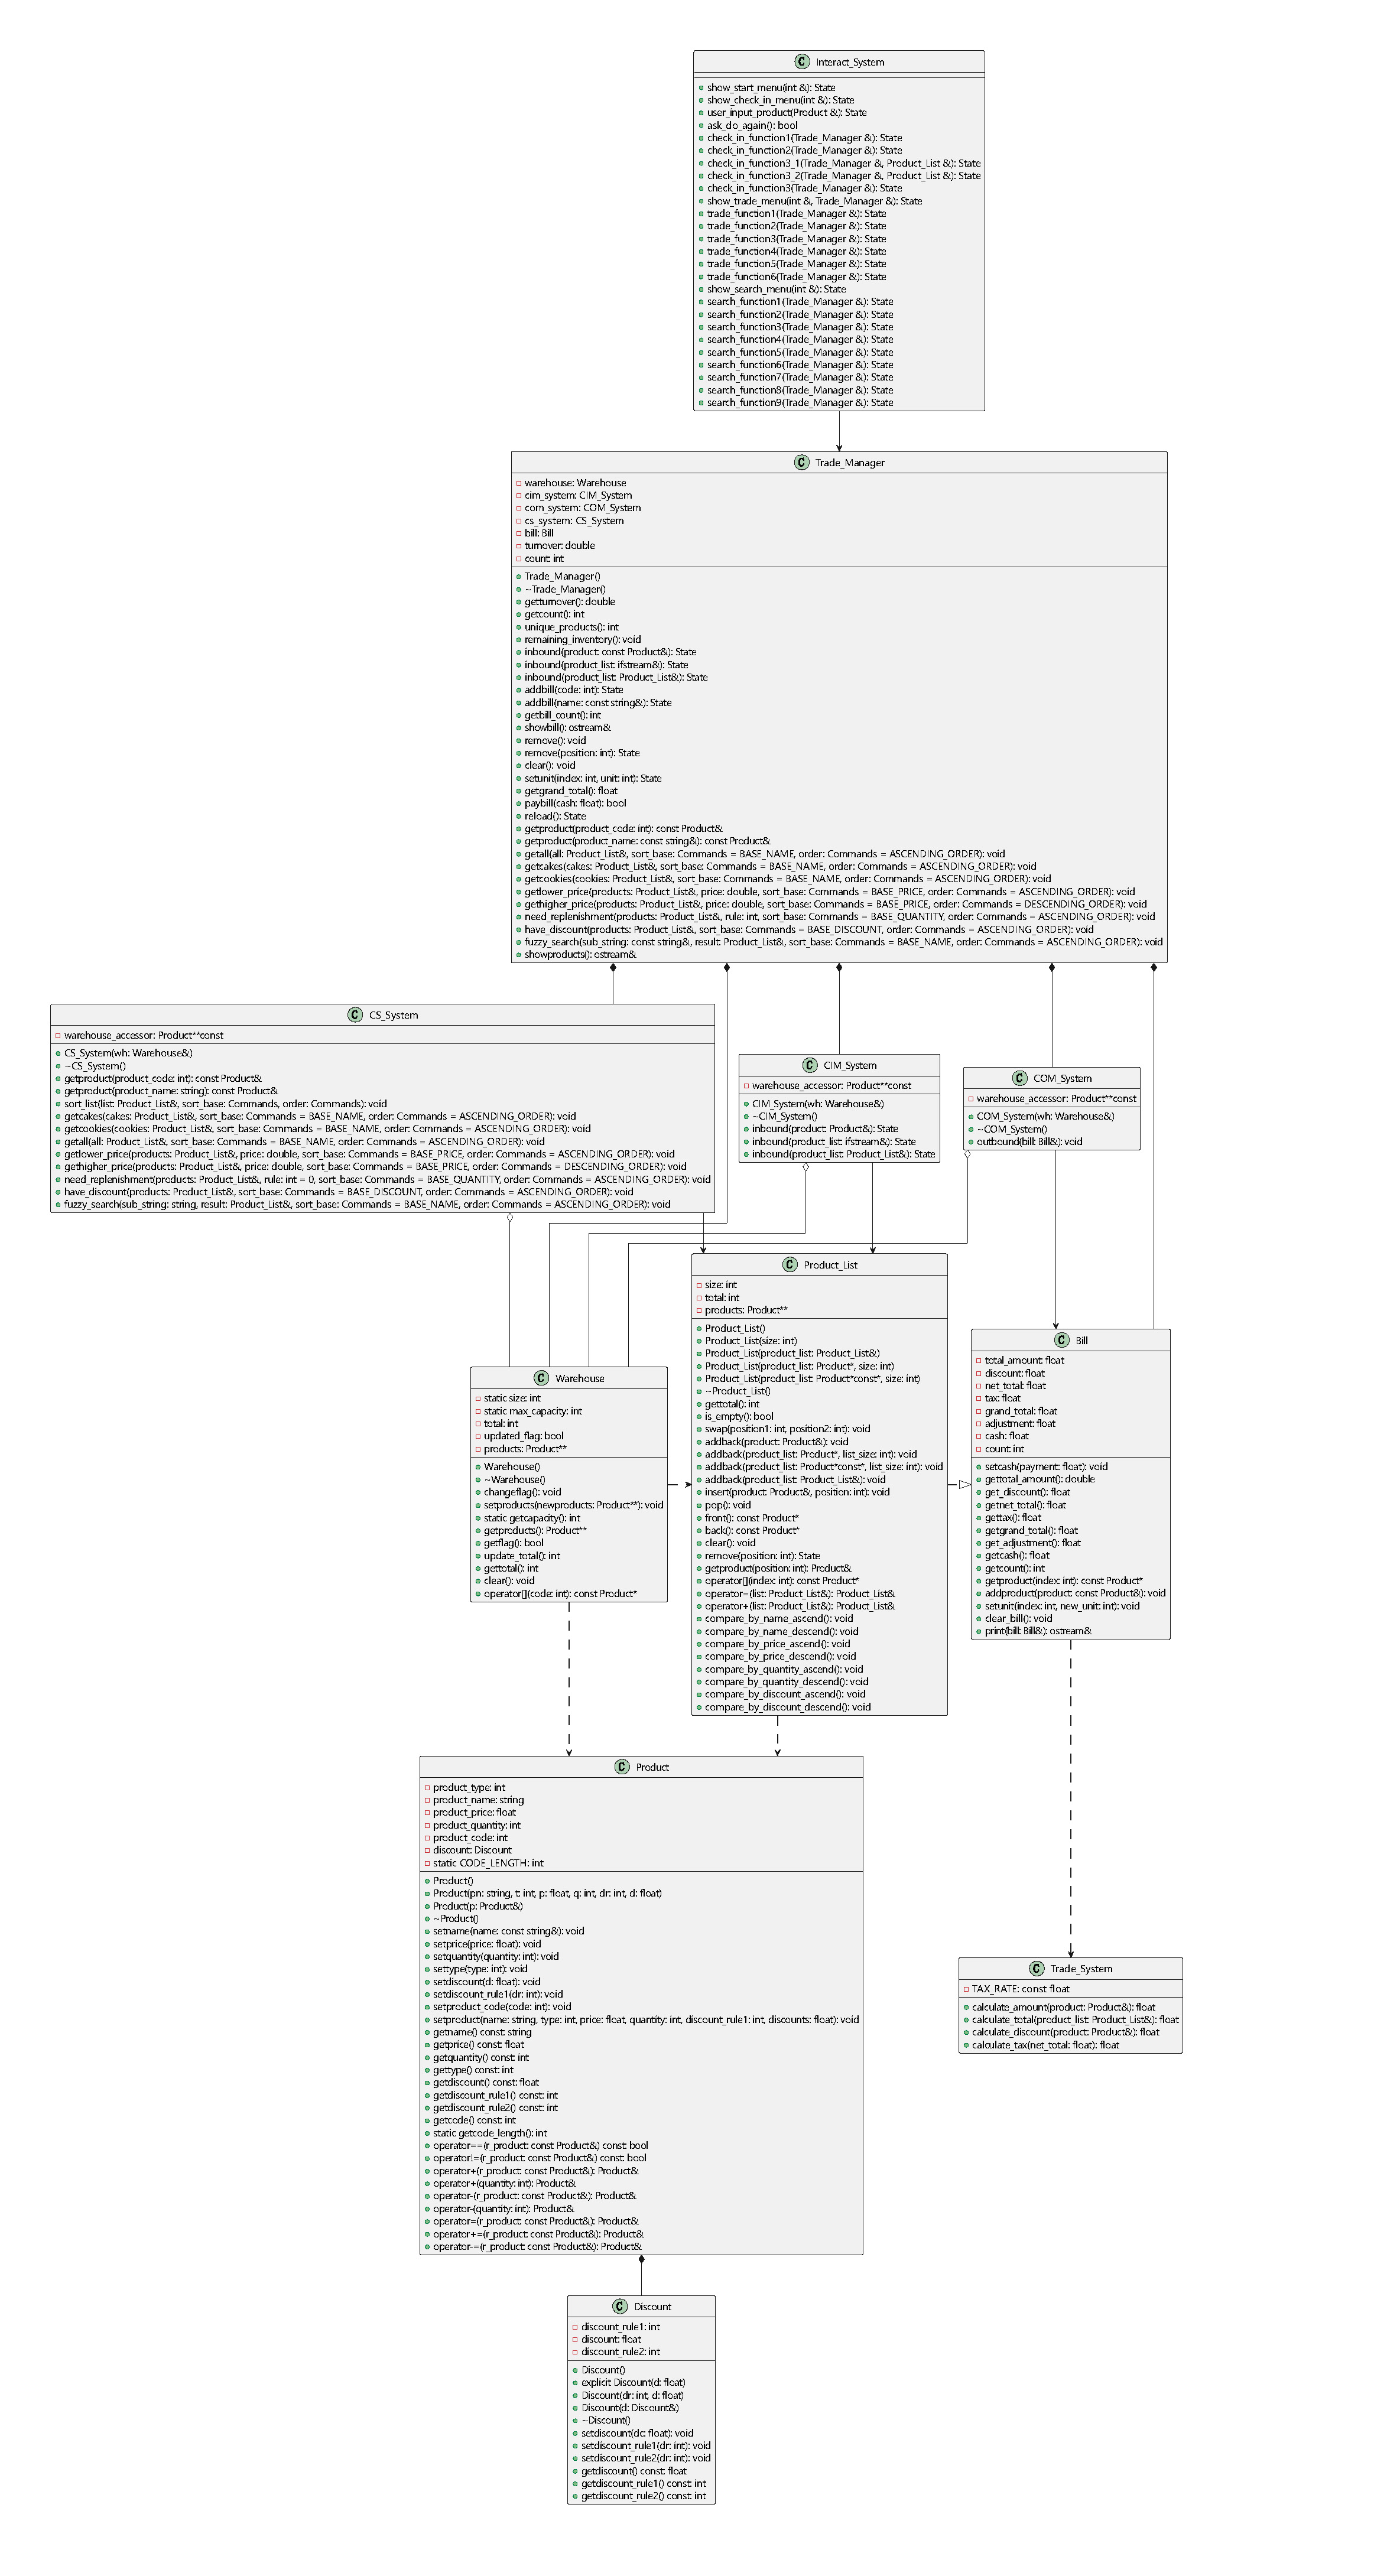

#Case Run 1
Testing the operation of other functions without initializing the program. Initialize the program and test the program's ability to handle erroneous inputs
##Input-Expected Output:
2 -- Program tells user you havn't initialize can't use this function

3 -- Program tells user you havn't initialize can't use this function

1 -- Access into the check in menu

2 -- Program asks user to enter the filename that user want to use for checking in

product.txt(wrong value test) -- Program asks user to enter a correct filename

2 -- Program asks user to enter the filename that user want to use for checking

product_list.txt -- Program tells user have successfully initialized

/-1 -- Program quit to main menu from check in menu



In [22]:
%%shell
./main.elf

						Welcome to Use This Trading System
Please select the function you want (Enter the number in front of the desired function to proceed):
(If you are using it for the first time, please initialize first, otherwise the program may not run properly)
1.Check in
2.Trade
3.Search Product
Your choice(Enter /-1 to quit): 

CalledProcessError: Command './main.elf
' died with <Signals.SIGINT: 2>.

#Case Run 1
##Output:


Welcome to Use This Trading System

Please select the function you want (Enter the number in front of the desired function to proceed):

(If you are using it for the first time, please initialize first, otherwise the program may not run properly)

1.Check in

2.Trade

3.Search Product

Your choice(Enter /-1 to quit): 2

sh: 1: cls: not found

You haven't initialize the warehouse, please use check_in function to initialize first

​      Welcome to Use This Trading System

Please select the function you want (Enter the number in front of the desired function to proceed):

(If you are using it for the first time, please initialize first, otherwise the program may not run properly)

1.Check in

2.Trade

3.Search Product

Your choice(Enter /-1 to quit): 3

sh: 1: cls: not found

You haven't initialize the warehouse, please use check_in function to initialize first

​      Welcome to Use This Trading System

Please select the function you want (Enter the number in front of the desired function to proceed):

(If you are using it for the first time, please initialize first, otherwise the program may not run properly)

1.Check in

2.Trade

3.Search Product

Your choice(Enter /-1 to quit): 1

sh: 1: cls: not found

1.Add items one by one

2.Add items from a file

3.Replenish products

Your choice (Enter /-1 to quit):2

Please enter the filename that you want to add

The filename is (Enter /-1 to quit): product.txt

sh: 1: cls: not found

The filename you entered can't be find, please check whether the filename is correct or not

1.Add items one by one

2.Add items from a file

3.Replenish products

Your choice (Enter /-1 to quit):2

Please enter the filename that you want to add

The filename is (Enter /-1 to quit): product_list.txt

sh: 1: cls: not found

You have successfully added them into warehouse

1.Add items one by one

2.Add items from a file

3.Replenish products

Your choice (Enter /-1 to quit):/-1

​      Welcome to Use This Trading System

Please select the function you want (Enter the number in front of the desired function to proceed):

(If you are using it for the first time, please initialize first, otherwise the program may not run properly)

1.Check in

2.Trade

3.Search Product

Your choice(Enter /-1 to quit):

#Case Run 2
Restart the program witout using check in function and then print all the products that has been lorded into warehouse sorted base on name and using ascending order to test the automatically reload ability for this program. Test the program's ability to handle erroneous inputs
##Input-Expected Output:
3 -- Access into the search menu

10 -- Program ask user to enter a correct chocie

1 -- Program asks user to choose base on what to sort the search result

5 -- Program asks user to enter a correct chocie

-1 -- Program asks user to enter a correct chocie

0 -- Program asks user to choose using ascending or descending order to sort

5 -- Program asks user to enter a correct chocie

0 -- Program print the total number of products that are in the warehouse and print the detail for each products.

press enter -- Quit to the search menu

In [ ]:
%%shell
./main.elf

#Case Run 2
##Output:




Welcome to Use This Trading System

Please select the function you want (Enter the number in front of the desired function to proceed):

(If you are using it for the first time, please initialize first, otherwise the program may not run properly)

1.Check in

2.Trade

3.Search Product

Your choice(Enter /-1 to quit): 3

sh: 1: cls: not found

1.Get all products

2.Get all cakes

3.Get all cookies

4.Get all products that its price is lower than one price

5.Get all products that its price is higher than one price

6.Get products that need to replenish

7.Fuzzy search for some certain products

8.Accurate search for one certain product (code)

9.Accurate search for one certain product (name)

Your choice (Enter /-1 to quit): 10

You have entered a wrong value for choice, pleas enter again: 1

sh: 1: cls: not found

Please choose the basis for your ranking

BASE_NAME = 0, BASE_PRICE = 1, BASE_QUANTITY = 2, BASE_DISCOUNT = 3,

Your choice (Enter /-1 to quit):

5

You have entered a wrong value, please enter again (Enter /-1 to quit):  -1

You have entered a wrong value, please enter again (Enter /-1 to quit):  0

Please choose your sort order (Enter /-1 to quit)

Ascending(0) or Descending(1)

Your choice (Enter /-1 to quit):

5

You have entered a wrong value, please enter again (Enter /-1 to quit):  0

There are 458 products in this warehouse

Because of there are too many products in the warehouse, only choose some products at the begining and end of the output to show here




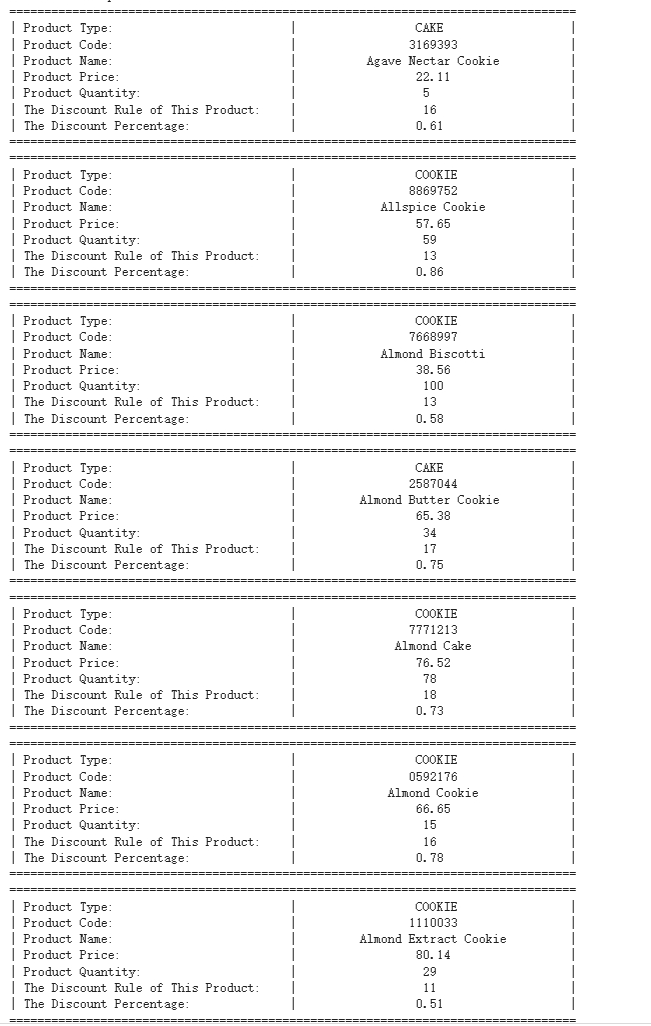

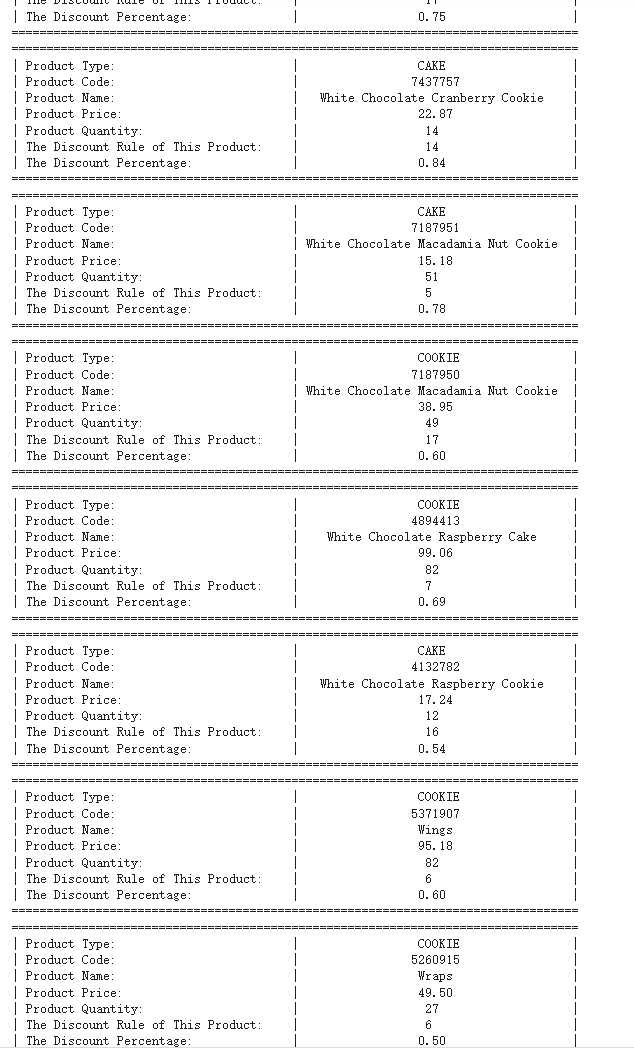

Press enter key to go back to search menu.

sh: 1: cls: not found

1.Get all products

2.Get all cakes

3.Get all cookies

4.Get all products that its price is lower than one price

5.Get all products that its price is higher than one price

6.Get products that need to replenish

7.Fuzzy search for some certain products

8.Accurate search for one certain product (code)

9.Accurate search for one certain product (name)

Your choice (Enter /-1 to quit):

#Case Run 3
Test the user input inbound function in the check in menu, and test the function's ability to handle incorrect inputs. Use the name search function in the search menu to find the product just added.
##Input-Expected Output
1 -- Access into the check in menu

1 -- Program ask user to enter the type of product

CEKA -- Program ask user to enter correct type

cAke -- Program ask user to enter the name of product

test1 -- Program ask user to enter the price of product

-1 -- Program ask user to enter the correct price

15.5 -- Program ask user to enter the quantity of product

-5 -- Program ask user to enter the quantity of product

20 -- Program ask user to enter the discount rule of product

-10 -- Program ask user to enter a correct discount rule

10 -- Program ask user to enter the discount percentage of product

-5 -- Program ask user to enter the correct discount percentage of product

2 -- Program ask user to enter the correct discount percentage of product

0.55 -- Program ask user to check the entered information of this product

A -- Program ask user to enter the correct choice

Y -- Program tells user that the product has been successfully added into warehouse and quit to check in menu

/-1 -- Quit to the main menu

3 -- Access into the search menu

9 -- Program ask user to enter the name of product that user want to search

press enter -- Program quit to search menu

/-1 -- Quit to the main menu

/-1 -- close the program

In [ ]:
%%shell
./main.elf

#Case Run 3
##Output
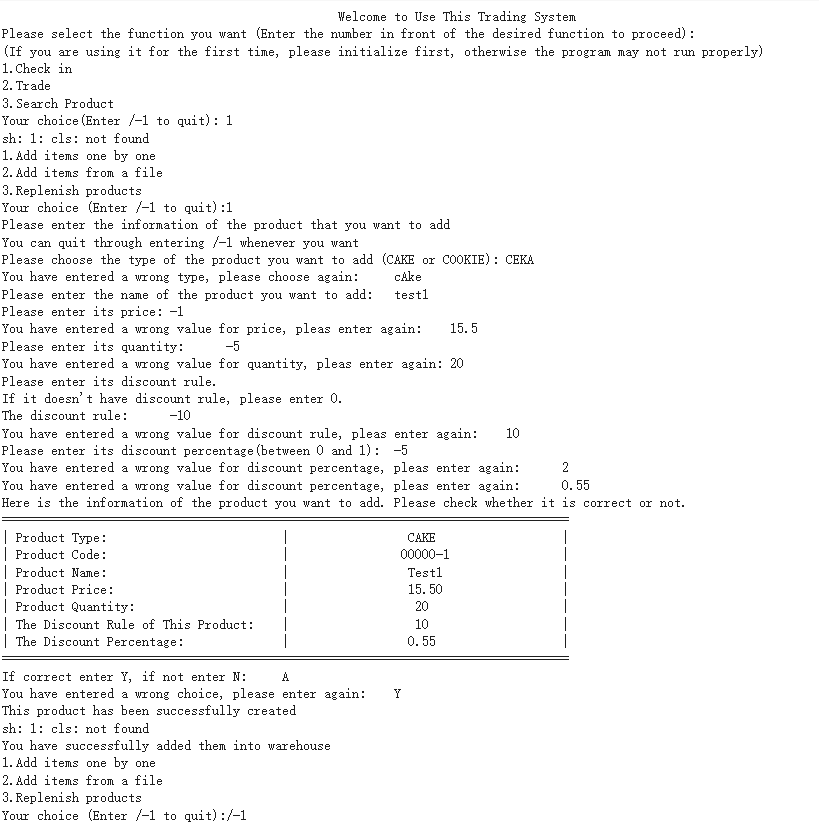

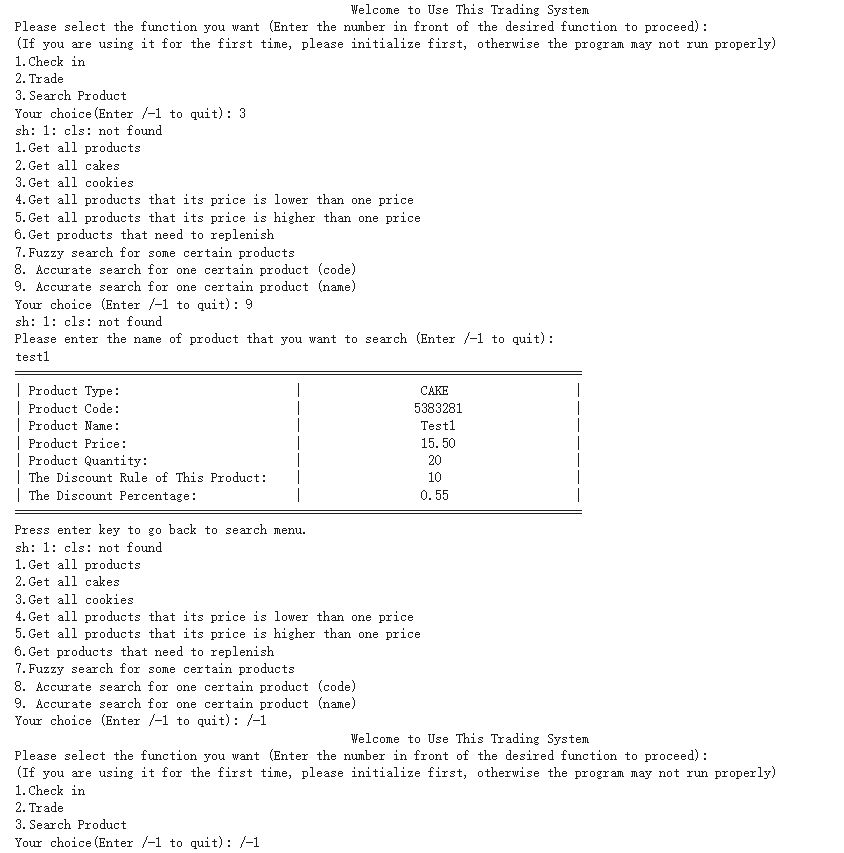

From the new wrtied remaining_inventory.txt file we can also find the product that we have entered


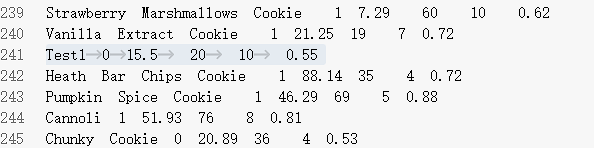

#Case Run 4
Test the trade function.
##Input-Expected Output

2 – Access into the trade menu

1 – Program ask user to enter the code of product

5371907  – Program print the bill and ask user to enter again or quit

5769980   – Program print the bill and ask user to enter again or quit

7417230  – Program print the bill and ask user to enter again or quit

4954677  – Program print the bill and ask user to enter again or quit

3293857  – Program print the bill and ask user to enter again or quit

/-1 – Program quit to the trade menu

2 – Program ask user to enter the name of product wanted to add into the bill

test1 –  Program add product whose name is test1 into the bill and print the new bill

/-1 – Program quit to the trade menu

3 – Program print the bill and ask user to choose which product he or she would like to remove from the bill

1 – Program remove the first product and print the new bill

/-1 – Program quit to trade menu

4 – Program ask user to choose which product he or she  would like to set the unit.

5 – Program ask user  to enter the new unit for the chosen product

100 – Program show the quantity in warehouse of the chosen product and tells user to enter a correct unit

5 – Program ask user  to enter the new unit for the chosen product

20 – Program print the new bill

/-1 – Program quit to trade menu

5 – Program ask user to enter the receipt

358 – Program calculate whether the receipt could pay the bill and print the  unpaid money

1 – Program calculate whether the receipt could pay the remaining bill and print the  change

/-1 – Program quit to the trade menu

6 – Program print the daily sale data from the file which was wrote when outbound.

/-1 – Program quit to the main menu

3 – Access into search menu

1 – Program ask user to choose the sort rule

0 – Program ask user to choose the sort order

0 – Program print the total number of products  that are in the warehouse and its detail information

In [27]:
%%shell
./main.elf

						Welcome to Use This Trading System
Please select the function you want (Enter the number in front of the desired function to proceed):
(If you are using it for the first time, please initialize first, otherwise the program may not run properly)
1.Check in
2.Trade
3.Search Product
Your choice(Enter /-1 to quit): 2
sh: 1: cls: not found
1.Enter the code of product to add it into bill
2.Enter the name of product to add it into bill
3.Remove a product that is in the bill
4.Set quantity of a product that is in the bill
5.Pay the bill
6.Get daily sales data
Your choice (Enter /-1 to quit): 1
Please enter the code of the product you want to add (Enter /-1 to quit):	5371907
sh: 1: cls: not found
                        INVOICE
|==========================================================|
| Date:   05/21/24                      Time:     11:38:27 |
|----------------------------------------------------------|
| Unit    Unit Price(RM)     Discount(RM)       Amount(RM) |
|--------------------

CalledProcessError: Command './main.elf
' died with <Signals.SIGINT: 2>.

#Case Run 4
##Output



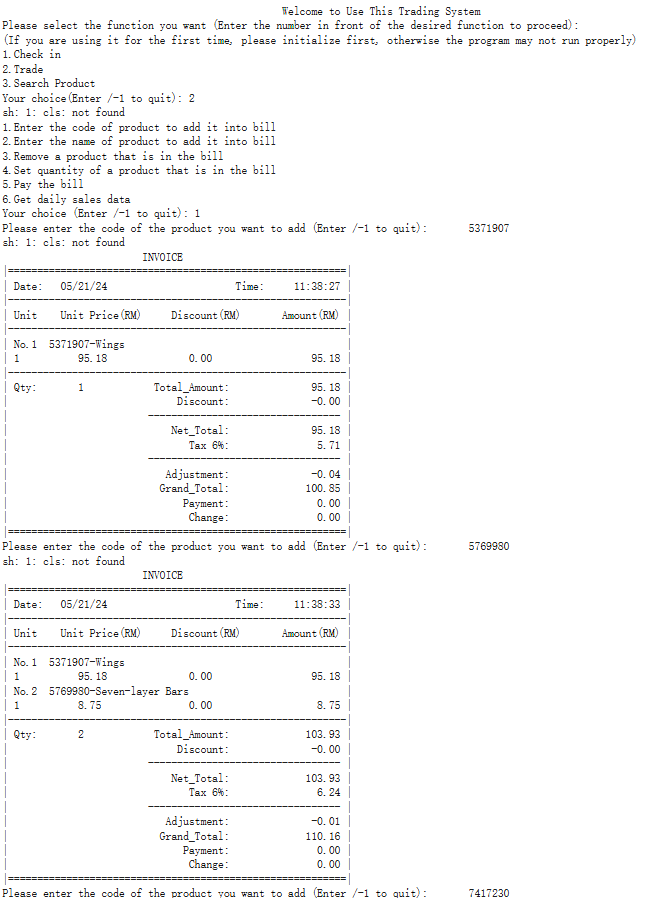

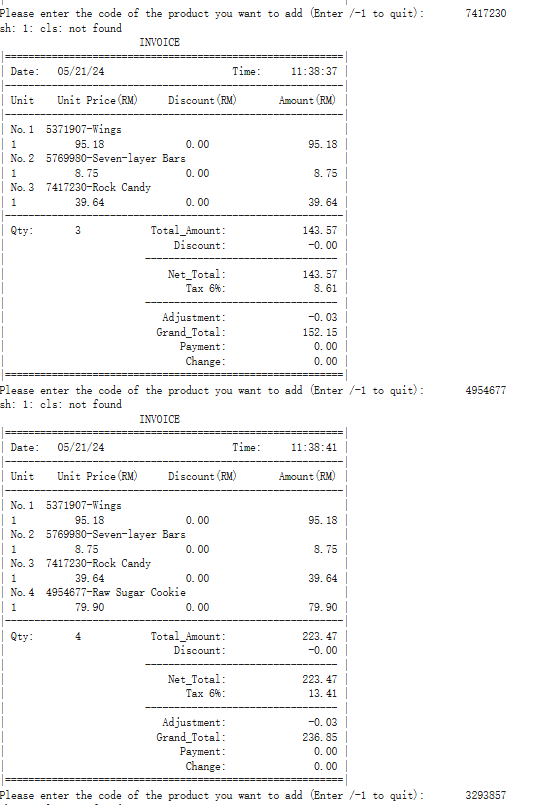

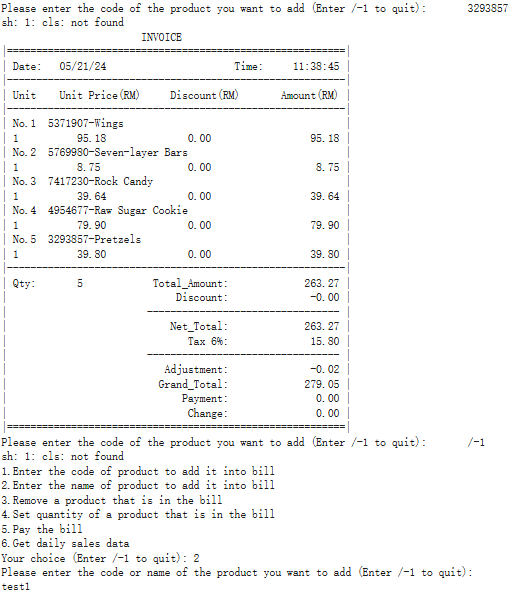

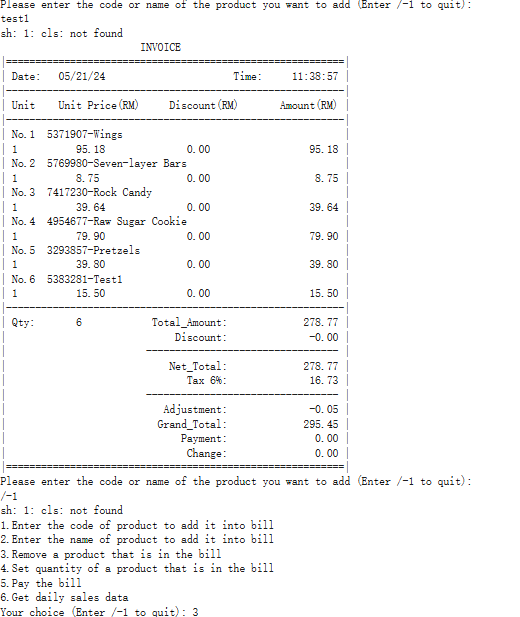

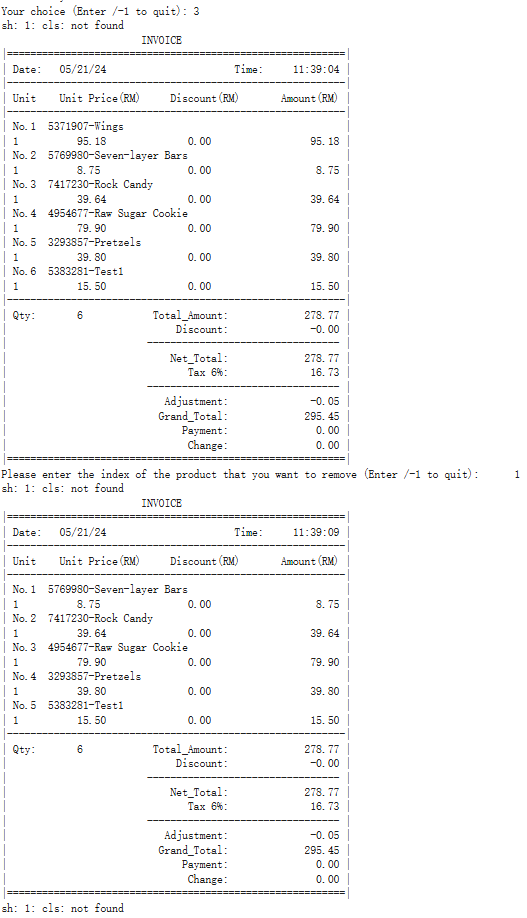

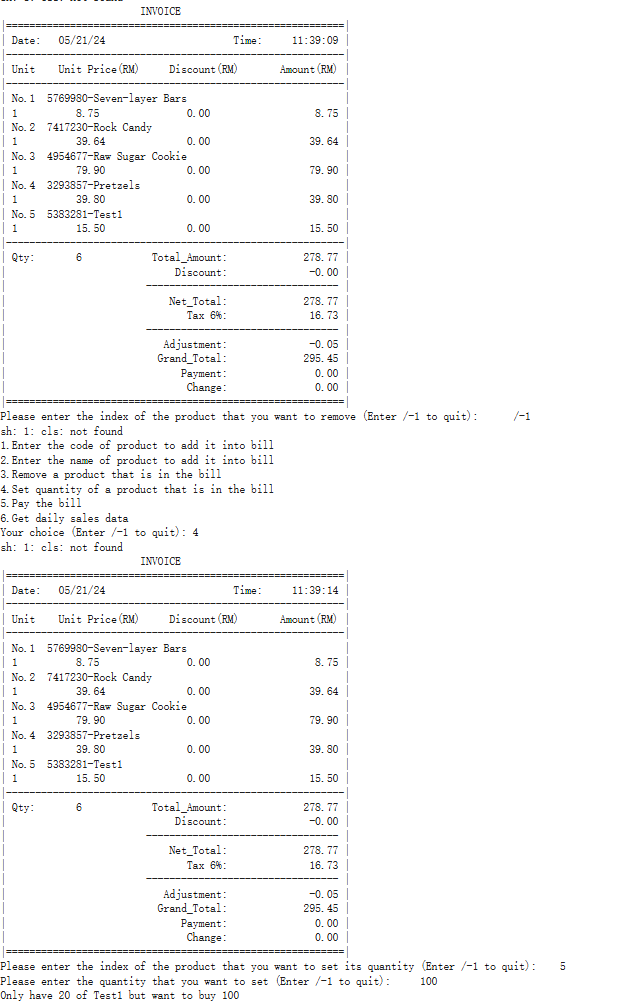

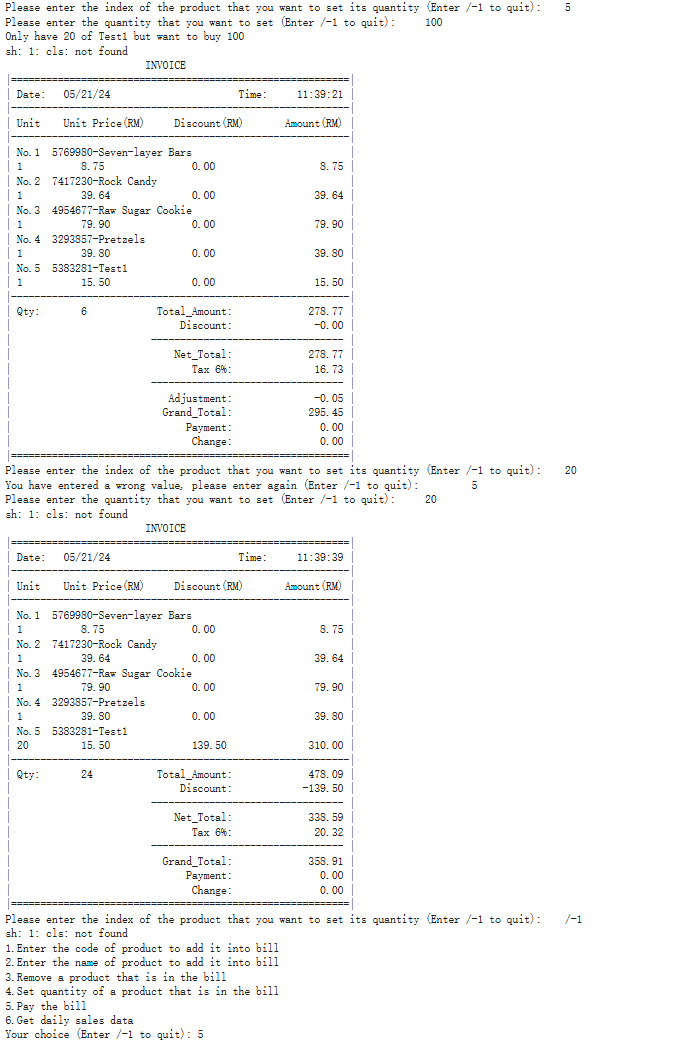

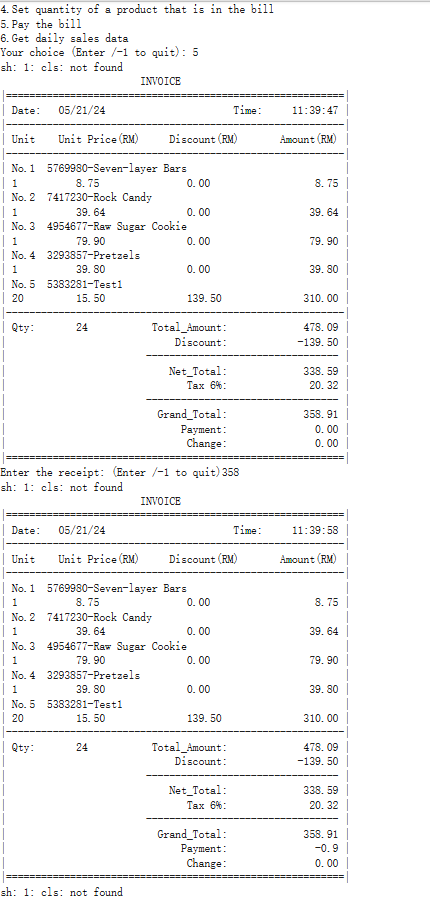

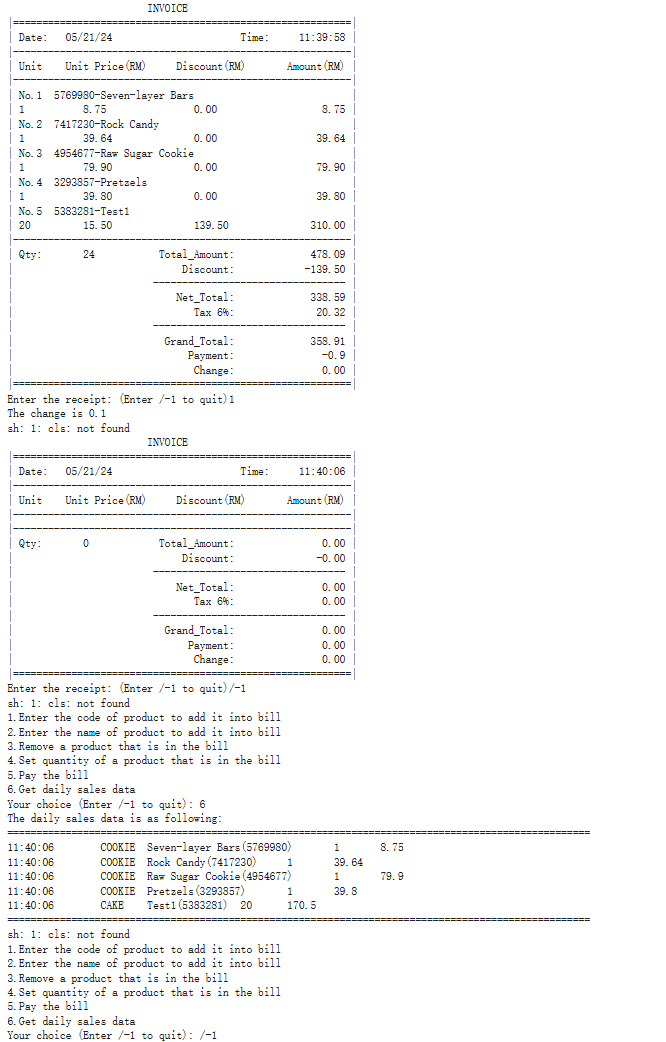

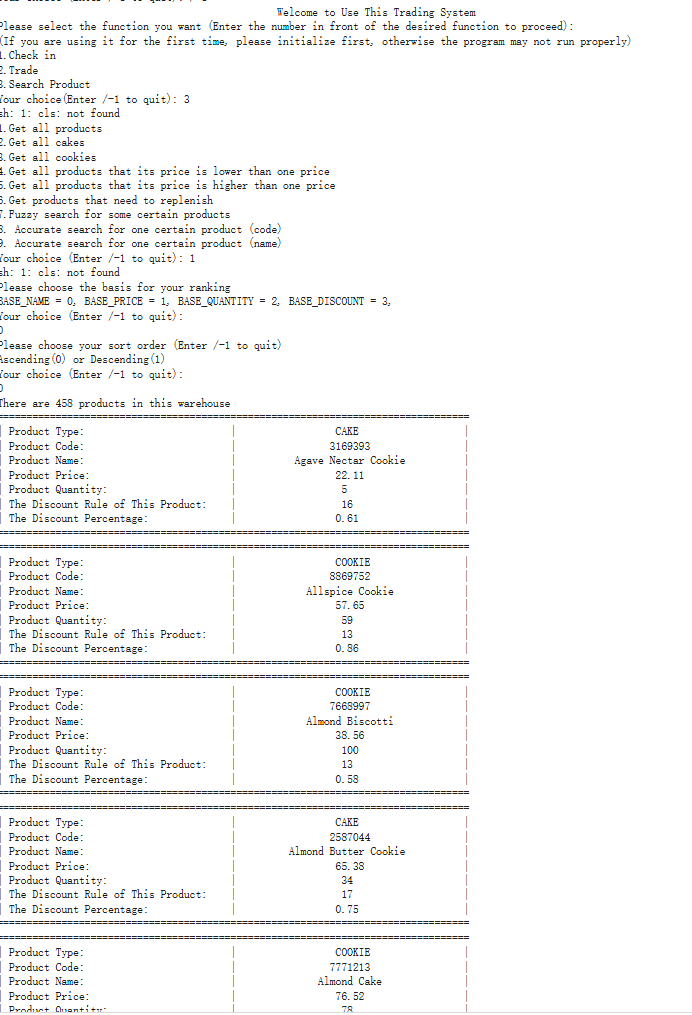


##Explanation:
At the time of initialization we had 458 products, in the above test we manually added a product called test1 with a quantity of 20. In the transaction we just made we purchased a total of 20 test1, so the warehouse thinks it is out of stock, so the count is still 458 products when counted again.
In the printed bill there is a line for adjustment which is designed to eliminate the number of decimal places that are created by decimal operations that cannot be paid for in real life, but due to the internal precision of the computer, it sometimes displays a number that is different from the value that should be subtracted.